## Library Imports

In [1]:
# install csep python library
#!pip install cartopy
#!pip install pyCSEP
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import cartopy
import csep
from csep.utils import datasets, time_utils, plots
from csep.core import poisson_evaluations as poisson
from scipy.stats import poisson as poisson_stat

import sys
import os
sys.path.append(os.path.abspath("../src"))
# import functions for hdf5 forecast format
import functions_for_hdf5_parallel as f_hdf5
# import functions to calculate the Q and L-Scores
import QandL as QL

Catalog of observed events used in Section 4 can be obtained for any time frame depending on the year/month/day hour\:minute\:second. On the paper we only focused on a time frame of a calendar year. Model forecasts can be obtained depending on the day/month/year. This can only be done depending on the date that the model was run. For start and end dates, please refer to: https://cseptesting.org/grid-based-forecasts/ Model's forecast can also be dowloaded from there.

NOTE: Forecast data has to be downloaded before running the following code. Files are in hdf5 format.

## 2008

Fetched ComCat catalog in 3.9589693546295166 seconds.

Downloaded catalog from ComCat with following parameters
Start Date: 2008-01-02 03:48:12.500000+00:00
End Date: 2008-12-31 22:56:00.220000+00:00
Min Latitude: 31.5038333 and Max Latitude: 42.0371667
Min Longitude: -125.3458333 and Max Longitude: -113.1393333
Min Magnitude: 2.5
Found 1703 events in the ComCat catalog.

        Name: None

        Start Date: 2008-01-19 17:18:46.470000+00:00
        End Date: 2008-12-28 05:17:07.470000+00:00

        Latitude: (31.8333333, 41.1885)
        Longitude: (-125.3406667, -115.2295)

        Min Mw: 3.95
        Max Mw: 5.44

        Event Count: 55
        


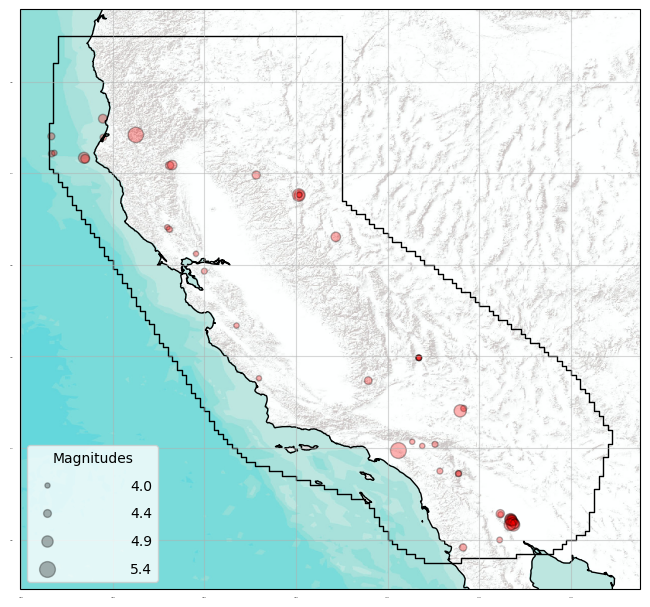

<GeoAxes: >

In [2]:
# set start and end date
start_time = csep.utils.time_utils.strptime_to_utc_datetime('2008-01-01 00:00:00.0')
end_time = csep.utils.time_utils.strptime_to_utc_datetime('2008-12-31 23:59:59.0')
# retrieve events in ComCat catalogue between start and end date
catalog = csep.query_comcat(start_time, end_time)

# set magnitude limits
min_mw = 3.95
max_mw = 8.95
# set magnitude bin length
dmw = 0.1

# Create space and magnitude regions. The forecast is already filtered in space and magnitude
magnitudes = csep.regions.magnitude_bins(min_mw, max_mw, dmw)
region = csep.regions.california_relm_region()

# Bind region information to the forecast
space_magnitude_region = csep.regions.create_space_magnitude_region(region, magnitudes)


# filter magnitude below 3.95
catalog.filter('magnitude >= 3.95')
# filter events outside spatial region
catalog.filter_spatial(space_magnitude_region)
# print summary information
print(catalog)

# Convert catalog of events into a dataframe
catalogEvents = catalog.to_dataframe()

# Plot of the location of observed events proportional to their magnitude
catalog.plot(show=True)

### ETAS

In [3]:
## Load ETAS model
## start date: 01 Aug. 2007    end date: 30 Aug. 2018
## missing days: 0        min. magnitude: 3.95

# model path within the quatation marks **Depends on dowloading the forecast files and stored them in the data folder**
# file name is assumed to not have been renamed from download
etas_filename = '../data/ETAS_1day.hdf5'
# this will be a dictonary of pandas.DataFrames
ETAS = f_hdf5.load_hdf5_to_dict(etas_filename,
                                     start_date = '01/01/2008', # format dd/mm/yyyy
                                     end_date = '31/12/2008')

Loading year: 2008
Loading month: 1
Loading month: 10
Loading month: 11
Loading month: 12
Loading month: 2
Loading month: 3
Loading month: 4
Loading month: 5
Loading month: 6
Loading month: 7
Loading month: 8
Loading month: 9


#### Q-Score

In [4]:
#Initialize an empty list to store data
all_df = []
#Loop through the nested dictionary
for year, months in ETAS.items():
    for month, files in months.items():
        for file_, df in files.items():
            #Append the dataframe to the list
            all_df.append(df)
            
#combine all the dataframes in the files into a single dataframe
ETAS_forec = pd.concat(all_df, ignore_index = True)

#Optional to free memory space
del ETAS
del all_df

#Q Score Calculation with different percentage retention
#Here we are retaining the top 5% of observed magnitudes
print(QL.calculate_Q_score(fore_df= ETAS_forec,
                                cat_df = catalogEvents,
                                perc_retain = 0.05))

0.47329792


#### L-Score

In [5]:
print(QL.ell_score(fore_df= ETAS_forec,
                        cat_df = catalogEvents))

# Optional to free memory space
del ETAS_forec

-330.7752


### STEP

In [6]:
## Load STEP model
## start date: 01 Aug. 2007    end date: 21 Jan. 2013
## missing days: 0        min. magnitude: 3.95

# model path within the quatation marks **Depends on dowloading the forecast files and stored them in the data folder****
# file name is assumed to not have been renamed from download
step_filename = '../data/STEP_1day.hdf5'
# this will be a dictonary of pandas.DataFrames
STEP = f_hdf5.load_hdf5_to_dict(step_filename,
                                     start_date = '01/01/2008', # format dd/mm/yyyy
                                     end_date = '31/12/2008')

Loading year: 2008
Loading month: 1
Loading month: 10
Loading month: 11
Loading month: 12
Loading month: 2
Loading month: 3
Loading month: 4
Loading month: 5
Loading month: 6
Loading month: 7
Loading month: 8
Loading month: 9


#### Q-Score

In [7]:
#Initialize an empty list to store data
all_df = []
#Loop through the nested dictionary
for year, months in STEP.items():
    for month, files in months.items():
        for file_, df in files.items():
            #Append the dataframe to the list
            all_df.append(df)
            
#combine all the dataframes in the files into a single dataframe
STEP_forec = pd.concat(all_df, ignore_index = True)

#Optional to free memory space
del STEP
del all_df

#Q Score Calculation with different percentage retention
#Here we are retaining the top 5% of observed magnitudes
print(QL.calculate_Q_score(fore_df= STEP_forec,
                                cat_df = catalogEvents,
                                perc_retain = 0.05))

2.4931226


#### L-Score

In [8]:
print(QL.ell_score(fore_df= STEP_forec,
                    cat_df = catalogEvents))

#Optional to free memory space
del STEP_forec

-211.03438


## 2009

Fetched ComCat catalog in 2.7087409496307373 seconds.

Downloaded catalog from ComCat with following parameters
Start Date: 2009-01-01 03:37:59.850000+00:00
End Date: 2009-12-31 19:57:42.940000+00:00
Min Latitude: 31.5523333 and Max Latitude: 42.5413333
Min Longitude: -125.398 and Max Longitude: -113.1813333
Min Magnitude: 2.5
Found 1207 events in the ComCat catalog.

        Name: None

        Start Date: 2009-01-04 17:27:10.480000+00:00
        End Date: 2009-12-30 19:07:41.530000+00:00

        Latitude: (31.711, 42.5413333)
        Longitude: (-124.637, -114.539)

        Min Mw: 3.95
        Max Mw: 5.8

        Event Count: 43
        


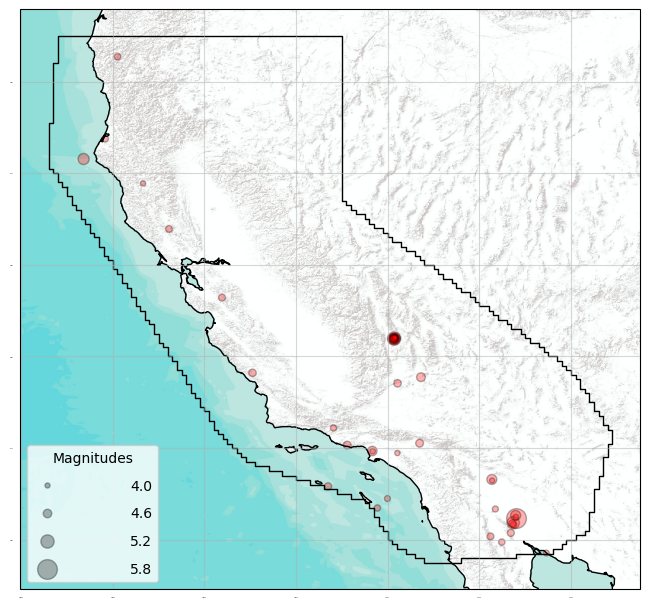

<GeoAxes: >

In [9]:
# set start and end date
start_time = csep.utils.time_utils.strptime_to_utc_datetime('2009-01-01 00:00:00.0')
end_time = csep.utils.time_utils.strptime_to_utc_datetime('2009-12-31 23:59:59.0')
# retrieve events in ComCat catalogue between start and end date
catalog = csep.query_comcat(start_time, end_time)

# set magnitude limits
min_mw = 3.95
max_mw = 8.95
# set magnitude bin length
dmw = 0.1

# Create space and magnitude regions. The forecast is already filtered in space and magnitude
magnitudes = csep.regions.magnitude_bins(min_mw, max_mw, dmw)
region = csep.regions.california_relm_region()

# Bind region information to the forecast
space_magnitude_region = csep.regions.create_space_magnitude_region(region, magnitudes)


# filter magnitude below 3.95
catalog.filter('magnitude >= 3.95')
# filter events outside spatial region
catalog.filter_spatial(space_magnitude_region)
# print summary information
print(catalog)

# Convert catalog of events into a dataframe
catalogEvents = catalog.to_dataframe()

# Plot of the location of observed events proportional to their magnitude
catalog.plot(show=True)

### ETAS

In [10]:
## Load ETAS model
## start date: 01 Aug. 2007    end date: 30 Aug. 2018
## missing days: 0        min. magnitude: 3.95

# model path within the quatation marks **Depends on dowloading the forecast files and stored them in the data folder**
# file name is assumed to not have been renamed from download
etas_filename = '../data/ETAS_1day.hdf5'
# this will be a dictonary of pandas.DataFrames
ETAS = f_hdf5.load_hdf5_to_dict(etas_filename,
                                     start_date = '01/01/2009', # format dd/mm/yyyy
                                     end_date = '31/12/2009')

Loading year: 2009
Loading month: 1
Loading month: 10
Loading month: 11
Loading month: 12
Loading month: 2
Loading month: 3
Loading month: 4
Loading month: 5
Loading month: 6
Loading month: 7
Loading month: 8
Loading month: 9


#### Q-Score

In [11]:
#Initialize an empty list to store data
all_df = []
#Loop through the nested dictionary
for year, months in ETAS.items():
    for month, files in months.items():
        for file_, df in files.items():
            #Append the dataframe to the list
            all_df.append(df)
            
#combine all the dataframes in the files into a single dataframe
ETAS_forec = pd.concat(all_df, ignore_index = True)

#Optional to free memory space
del ETAS
del all_df

#Q Score Calculation with different percentage retention
print(QL.calculate_Q_score(fore_df= ETAS_forec,
                                cat_df = catalogEvents,
                                perc_retain = 0.05))

1.6609501


#### L-Score

In [12]:
print(QL.ell_score(fore_df= ETAS_forec,
                        cat_df = catalogEvents))
#Optional to free memory space
del ETAS_forec

-276.55215


### STEP

In [13]:
## Load STEP model
## start date: 01 Aug. 2007    end date: 21 Jan. 2013
## missing days: 0        min. magnitude: 3.95

# model path within the quatation marks **Depends on dowloading the forecast files and stored them in the data folder**
# file name is assumed to not have been renamed from download
step_filename = '../data/STEP_1day.hdf5'
# this will be a dictonary of pandas.DataFrames
STEP = f_hdf5.load_hdf5_to_dict(step_filename,
                                     start_date = '01/01/2009', # format dd/mm/yyyy
                                     end_date = '31/12/2009')

Loading year: 2009
Loading month: 1
Loading month: 10
Loading month: 11
Loading month: 12
Loading month: 2
Loading month: 3
Loading month: 4
Loading month: 5
Loading month: 6
Loading month: 7
Loading month: 8
Loading month: 9


#### Q-Score

In [14]:
#Initialize an empty list to store data
all_df = []
#Loop through the nested dictionary
for year, months in STEP.items():
    for month, files in months.items():
        for file_, df in files.items():
            #Append the dataframe to the list
            all_df.append(df)
            
#combine all the dataframes in the files into a single dataframe
STEP_forec = pd.concat(all_df, ignore_index = True)

#Optional to free memory space
del STEP
del all_df

#Q Score Calculation with different percentage retention
print(QL.calculate_Q_score(fore_df= STEP_forec,
                                cat_df = catalogEvents,
                                perc_retain = 0.05))

1.9303938


#### L-Score

In [15]:
print(QL.ell_score(fore_df= STEP_forec,
                    cat_df = catalogEvents))
#Optional to free memory space
del STEP_forec

-165.31847


### KJSSOneDay

In [16]:
## Load KJSSOneDay model
## start date: 01 Jan. 2009    end date: 30 June 2018
## missing days: 0        min. magnitude: 3.95

# model path within the quatation marks **Depends on dowloading the forecast files and stored them in the data folder**
# file name is assumed to not have been renamed from download
KJSSOne_filename = '../data/KJSSOneDayCalifornia_1day.hdf5'
# this will be a dictonary of pandas.DataFrames
KJSSOne = f_hdf5.load_hdf5_to_dict(KJSSOne_filename,
                                     start_date = '01/01/2009', # format dd/mm/yyy
                                     end_date = '31/12/2009')

Loading year: 2009
Loading month: 1
Loading month: 10
Loading month: 11
Loading month: 12
Loading month: 2
Loading month: 3
Loading month: 4
Loading month: 5
Loading month: 6
Loading month: 7
Loading month: 8
Loading month: 9


#### Q-Score

In [17]:
#Initialize an empty list to store data
all_df = []
#Loop through the nested dictionary
for year, months in KJSSOne.items():
    for month, files in months.items():
        for file_, df in files.items():
            #Append the dataframe to the list
            all_df.append(df)
            
#combine all the dataframes in the files into a single dataframe
KJSSOne_forec = pd.concat(all_df, ignore_index = True)

#Optional to free memory space
del KJSSOne
del all_df

#Q Score Calculation with different percentage retention
print(QL.calculate_Q_score(fore_df= KJSSOne_forec,
                                cat_df = catalogEvents,
                                perc_retain = 0.05))

1.584117


#### L-Score

In [19]:
#L-score diverges
print(QL.ell_score(fore_df= KJSSOne_forec,
                    cat_df = catalogEvents))

# add waterlevelto zero valued bins
print(QL.ell_score(fore_df= KJSSOne_forec,
                    cat_df = catalogEvents, 
                    waterlevel = 1e-6))

#Optional to free memory space
del KJSSOne_forec

C:\Users\arjon\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


-inf
-224.68491759829112


C:\Users\arjon\OneDrive\Documents\S Score\Project\src\QandL.py:39: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1e-06' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  df_out.iloc[target_idx,6] = waterlevel


## 2010

Fetched ComCat catalog in 4.598601818084717 seconds.

Downloaded catalog from ComCat with following parameters
Start Date: 2010-01-01 02:33:42.820000+00:00
End Date: 2010-12-31 17:59:32.590000+00:00
Min Latitude: 31.5136667 and Max Latitude: 42.4743333
Min Longitude: -125.399 and Max Longitude: -113.1186667
Min Magnitude: 2.5
Found 4998 events in the ComCat catalog.

        Name: None

        Start Date: 2010-01-04 14:24:54.440000+00:00
        End Date: 2010-12-23 12:37:35.020000+00:00

        Latitude: (31.715, 40.9511667)
        Longitude: (-125.2775, -114.8613333)

        Min Mw: 3.95
        Max Mw: 7.2

        Event Count: 187
        


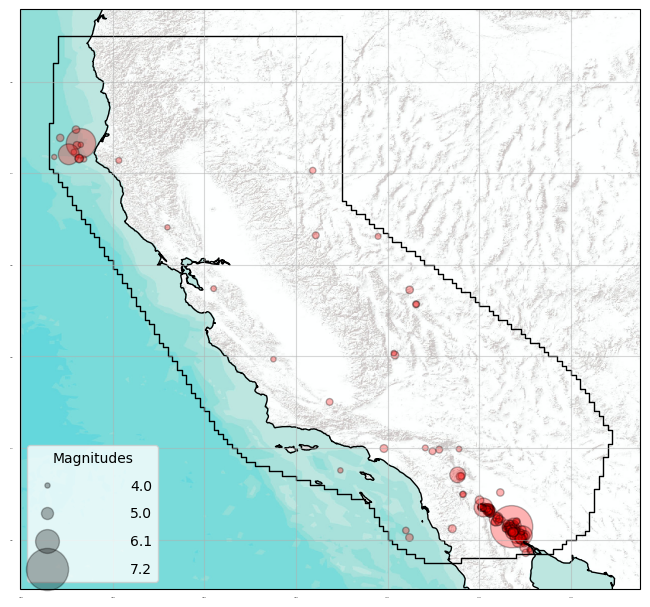

<GeoAxes: >

In [20]:
# set start and end date
start_time = csep.utils.time_utils.strptime_to_utc_datetime('2010-01-01 00:00:00.0')
end_time = csep.utils.time_utils.strptime_to_utc_datetime('2010-12-31 23:59:59.0')
# retrieve events in ComCat catalogue between start and end date
catalog = csep.query_comcat(start_time, end_time)

# set magnitude limits
min_mw = 3.95
max_mw = 8.95
# set magnitude bin length
dmw = 0.1

# Create space and magnitude regions. The forecast is already filtered in space and magnitude
magnitudes = csep.regions.magnitude_bins(min_mw, max_mw, dmw)
region = csep.regions.california_relm_region()

# Bind region information to the forecast
space_magnitude_region = csep.regions.create_space_magnitude_region(region, magnitudes)


# filter magnitude below 3.95
catalog.filter('magnitude >= 3.95')
# filter events outside spatial region
catalog.filter_spatial(space_magnitude_region)
# print summary information
print(catalog)

catalogEvents = catalog.to_dataframe()
catalog.plot(show=True)

### ETAS

In [21]:
## Load ETAS model
## start date: 01 Aug. 2007    end date: 30 Aug. 2018
## missing days: 0        min. magnitude: 3.95

# model path within the quatation marks **Depends on dowloading the forecast files and stored them in the data folder**
# file name is assumed to not have been renamed from download
etas_filename = '../data/ETAS_1day.hdf5'
# this will be a dictonary of pandas.DataFrames
ETAS = f_hdf5.load_hdf5_to_dict(etas_filename,
                                     start_date = '01/01/2010', # format dd/mm/yyyy
                                     end_date = '31/12/2010')

Loading year: 2010
Loading month: 1
Loading month: 10
Loading month: 11
Loading month: 12
Loading month: 2
Loading month: 3
Loading month: 4
Loading month: 5
Loading month: 6
Loading month: 7
Loading month: 8
Loading month: 9


#### Q-Score

In [22]:
#Initialize an empty list to store data
all_df = []
#Loop through the nested dictionary
for year, months in ETAS.items():
    for month, files in months.items():
        for file_, df in files.items():
            #Append the dataframe to the list
            all_df.append(df)
            
#combine all the dataframes in the files into a single dataframe
ETAS_forec = pd.concat(all_df, ignore_index = True)

#Optional to free memory space
del ETAS
del all_df

#Q Score Calculation with different percentage retention
print(QL.calculate_Q_score(fore_df= ETAS_forec,
                                cat_df = catalogEvents,
                                perc_retain = 0.05))

1.0597266


#### L-Score

In [23]:
print(QL.ell_score(fore_df= ETAS_forec,
                        cat_df = catalogEvents))

#Optional to free memory space
del ETAS_forec

-667.6469


### STEP 

In [24]:
## Load STEP model
## start date: 01 Aug. 2007    end date: 21 Jan. 2013
## missing days: 0        min. magnitude: 3.95

# model path within the quatation marks **Depends on dowloading the forecast files and stored them in the data folder**
# file name is assumed to not have been renamed from download
step_filename = '../data/STEP_1day.hdf5'
# this will be a dictonary of pandas.DataFrames
STEP = f_hdf5.load_hdf5_to_dict(step_filename,
                                     start_date = '01/01/2010', # format dd/mm/yyyy
                                     end_date = '31/12/2010')

Loading year: 2010
Loading month: 1
Loading month: 10
Loading month: 11
Loading month: 12
Loading month: 2
Loading month: 3
Loading month: 4
Loading month: 5
Loading month: 6
Loading month: 7
Loading month: 8
Loading month: 9


#### Q-Score

In [25]:
#Initialize an empty list to store data
all_df = []
#Loop through the nested dictionary
for year, months in STEP.items():
    for month, files in months.items():
        for file_, df in files.items():
            #Append the dataframe to the list
            all_df.append(df)
            
#combine all the dataframes in the files into a single dataframe
STEP_forec = pd.concat(all_df, ignore_index = True)

#Optional to free memory space
del STEP
del all_df

#Q Score Calculation with different percentage retention
print(QL.calculate_Q_score(fore_df= STEP_forec,
                                cat_df = catalogEvents,
                                perc_retain = 0.05))

4.006758


#### L-Score

In [26]:
print(QL.ell_score(fore_df= STEP_forec,
                        cat_df = catalogEvents))
#Optional to free memory space
del STEP_forec

-468.13376


### KJSSOneDay

In [27]:
## Load KJSSOneDay model
## start date: 01 Jan. 2009    end date: 30 June 2018
## missing days: 0        min. magnitude: 3.95

# model path within the quatation marks **Depends on dowloading the forecast files and stored them in the data folder**
# file name is assumed to not have been renamed from download
KJSSOne_filename = '../data/KJSSOneDayCalifornia_1day.hdf5'
# this will be a dictonary of pandas.DataFrames
KJSSOne = f_hdf5.load_hdf5_to_dict(KJSSOne_filename,
                                     start_date = '01/01/2010', # format dd/mm/yyy
                                     end_date = '31/12/2010')

Loading year: 2010
Loading month: 1
Loading month: 10
Loading month: 11
Loading month: 12
Loading month: 2
Loading month: 3
Loading month: 4
Loading month: 5
Loading month: 6
Loading month: 7
Loading month: 8
Loading month: 9


#### Q-Score

In [28]:
#Initialize an empty list to store data
all_df = []
#Loop through the nested dictionary
for year, months in KJSSOne.items():
    for month, files in months.items():
        for file_, df in files.items():
            #Append the dataframe to the list
            all_df.append(df)
            
#combine all the dataframes in the files into a single dataframe
KJSSOne_forec = pd.concat(all_df, ignore_index = True)

#Optional to free memory space
del KJSSOne
del all_df

#Q Score Calculation with different percentage retention
print(QL.calculate_Q_score(fore_df= KJSSOne_forec,
                                cat_df = catalogEvents,
                                perc_retain = 0.05))

1.1648054


#### L-Score

In [29]:
print(QL.ell_score(fore_df= KJSSOne_forec,
                    cat_df = catalogEvents))

#Optional to free memory space
del KJSSOne_forec

-634.06274


## 2011

Fetched ComCat catalog in 3.991398572921753 seconds.

Downloaded catalog from ComCat with following parameters
Start Date: 2011-01-01 00:34:10.130000+00:00
End Date: 2011-12-31 19:14:44.380000+00:00
Min Latitude: 31.5168333 and Max Latitude: 42.6163333
Min Longitude: -125.3978333 and Max Longitude: -113.1328333
Min Magnitude: 2.5
Found 1386 events in the ComCat catalog.

        Name: None

        Start Date: 2011-01-08 00:10:16.740000+00:00
        End Date: 2011-12-30 15:34:29.360000+00:00

        Latitude: (31.8105, 41.027)
        Longitude: (-125.363, -114.6905)

        Min Mw: 3.95
        Max Mw: 5.09

        Event Count: 48
        


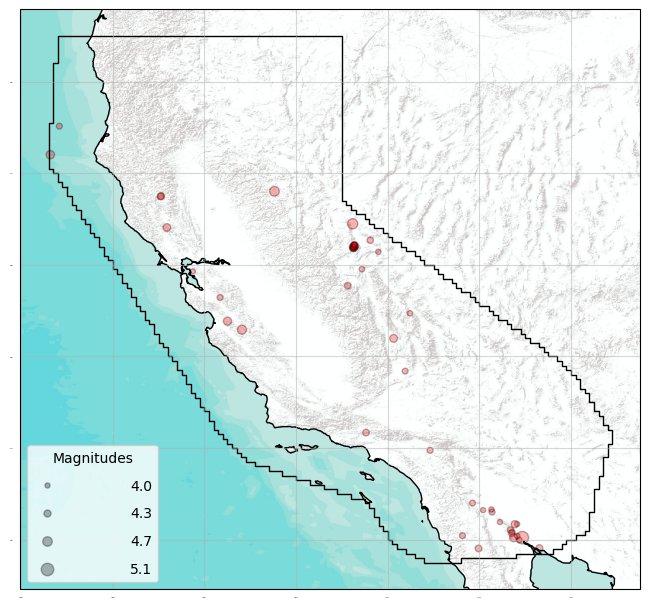

<GeoAxes: >

In [30]:
# set start and end date
start_time = csep.utils.time_utils.strptime_to_utc_datetime('2011-01-01 00:00:00.0')
end_time = csep.utils.time_utils.strptime_to_utc_datetime('2011-12-31 23:59:59.0')
# retrieve events in ComCat catalogue between start and end date
catalog = csep.query_comcat(start_time, end_time)

# set magnitude limits
min_mw = 3.95
max_mw = 8.95
# set magnitude bin length
dmw = 0.1

# Create space and magnitude regions. The forecast is already filtered in space and magnitude
magnitudes = csep.regions.magnitude_bins(min_mw, max_mw, dmw)
region = csep.regions.california_relm_region()

# Bind region information to the forecast
space_magnitude_region = csep.regions.create_space_magnitude_region(region, magnitudes)


# filter magnitude below 3.95
catalog.filter('magnitude >= 3.95')
# filter events outside spatial region
catalog.filter_spatial(space_magnitude_region)
# print summary information
print(catalog)

catalogEvents = catalog.to_dataframe()
catalog.plot(show=True)

### ETAS

In [31]:
## Load ETAS model
## start date: 01 Aug. 2007    end date: 30 Aug. 2018
## missing days: 0        min. magnitude: 3.95

# model path within the quatation marks **Depends on dowloading the forecast files and stored them in the data folder**
# file name is assumed to not have been renamed from download
etas_filename = '../data/ETAS_1day.hdf5'
# this will be a dictonary of pandas.DataFrames
ETAS = f_hdf5.load_hdf5_to_dict(etas_filename,
                                     start_date = '01/01/2011', # format dd/mm/yyyy
                                     end_date = '31/12/2011')

Loading year: 2011
Loading month: 1
Loading month: 10
Loading month: 11
Loading month: 12
Loading month: 2
Loading month: 3
Loading month: 4
Loading month: 5
Loading month: 6
Loading month: 7
Loading month: 8
Loading month: 9


#### Q-Score

In [32]:
#Initialize an empty list to store data
all_df = []
#Loop through the nested dictionary
for year, months in ETAS.items():
    for month, files in months.items():
        for file_, df in files.items():
            #Append the dataframe to the list
            all_df.append(df)
            
#combine all the dataframes in the files into a single dataframe
ETAS_forec = pd.concat(all_df, ignore_index = True)

#Optional to free memory space
del ETAS
del all_df

#Q Score Calculation with different percentage retention
print(QL.calculate_Q_score(fore_df= ETAS_forec,
                                cat_df = catalogEvents,
                                perc_retain = 0.05))

0.9381611


#### L-Score

In [33]:
print(QL.ell_score(fore_df= ETAS_forec,
                    cat_df = catalogEvents))

#Optional to free memory space
del ETAS_forec

-295.47137


### STEP

In [34]:
## Load STEP model
## start date: 01 Aug. 2007    end date: 21 Jan. 2013
## missing days: 0        min. magnitude: 3.95

# model path within the quatation marks **Depends on dowloading the forecast files and stored them in the data folder**
# file name is assumed to not have been renamed from download
step_filename = '../data/STEP_1day.hdf5'
# this will be a dictonary of pandas.DataFrames
STEP = f_hdf5.load_hdf5_to_dict(step_filename,
                                     start_date = '01/01/2011', # format dd/mm/yyyy
                                     end_date = '31/12/2011')

Loading year: 2011
Loading month: 1
Loading month: 10
Loading month: 11
Loading month: 12
Loading month: 2
Loading month: 3
Loading month: 4
Loading month: 5
Loading month: 6
Loading month: 7
Loading month: 8
Loading month: 9


#### Q-Score

In [35]:
#Initialize an empty list to store data
all_df = []
#Loop through the nested dictionary
for year, months in STEP.items():
    for month, files in months.items():
        for file_, df in files.items():
            #Append the dataframe to the list
            all_df.append(df)
            
#combine all the dataframes in the files into a single dataframe
STEP_forec = pd.concat(all_df, ignore_index = True)

#Optional to free memory space
del STEP
del all_df

#Q Score Calculation with different percentage retention
print(QL.calculate_Q_score(fore_df= STEP_forec,
                                cat_df = catalogEvents,
                                perc_retain = 0.05))

1.7694991


#### L-Score

In [36]:
print(QL.ell_score(fore_df= STEP_forec,
                        cat_df = catalogEvents))
#Optional to free memory space
del STEP_forec

-210.34457


### STEPJAVA

In [41]:
## Load STEPJAVA model
## start date: 01 Sep. 2010    end date: 30 June 2018
## missing days: 0        min. magnitude: 3.95

# model path within the quatation marks **Depends on dowloading the forecast files and stored them in the data folder**
# file name is assumed to not have been renamed from download
STEPJAVA_filename = '../data/STEPJAVA_1day.hdf5'
# this will be a dictonary of pandas.DataFrames
STEPJAVA = f_hdf5.load_hdf5_to_dict(STEPJAVA_filename,
                                     start_date = '01/01/2011', # format dd/mm/yyy
                                     end_date = '31/12/2011')

Loading year: 2011
Loading month: 1
Loading month: 10
Loading month: 11
Loading month: 12
Loading month: 2
Loading month: 3
Loading month: 4
Loading month: 5
Loading month: 6
Loading month: 7
Loading month: 8
Loading month: 9


#### Q-Score

In [42]:
#Initialize an empty list to store data
all_df = []
#Loop through the nested dictionary
for year, months in STEPJAVA.items():
    for month, files in months.items():
        for file_, df in files.items():
            #Append the dataframe to the list
            all_df.append(df)
            
#combine all the dataframes in the files into a single dataframe
STEPJAVA_forec = pd.concat(all_df, ignore_index = True)

#Optional to free memory space
del STEPJAVA
del all_df
#Q Score Calculation with different percentage retention
print(QL.calculate_Q_score(fore_df= STEPJAVA_forec,
                                cat_df = catalogEvents,
                                perc_retain = 0.05))

1.9638286


#### L-Score

In [43]:
print(QL.ell_score(fore_df= STEPJAVA_forec,
                 cat_df = catalogEvents))

# add waterlevelto zero valued bins
print(QL.ell_score(fore_df= STEPJAVA_forec,
                 cat_df = catalogEvents,
                 waterlevel = 1e-6))

#Optional to free memory space
del STEPJAVA_forec

C:\Users\arjon\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


-inf


C:\Users\arjon\OneDrive\Documents\S Score\Project\src\QandL.py:39: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1e-06' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  df_out.iloc[target_idx,6] = waterlevel


-254.19117290238606


### KJSSOneDay

In [44]:
## Load KJSSOneDay model
## start date: 01 Jan. 2009    end date: 30 June 2018
## missing days: 0        min. magnitude: 3.95

# model path within the quatation marks **Depends on dowloading the forecast files and stored them in the data folder**
# file name is assumed to not have been renamed from download
KJSSOne_filename = '../data/KJSSOneDayCalifornia_1day.hdf5'
# this will be a dictonary of pandas.DataFrames
KJSSOne = f_hdf5.load_hdf5_to_dict(KJSSOne_filename,
                                     start_date = '01/01/2011', # format dd/mm/yyy
                                     end_date = '31/12/2011')

Loading year: 2011
Loading month: 1
Loading month: 10
Loading month: 11
Loading month: 12
Loading month: 2
Loading month: 3
Loading month: 4
Loading month: 5
Loading month: 6
Loading month: 7
Loading month: 8
Loading month: 9


#### Q-Score

In [45]:
#Initialize an empty list to store data
all_df = []
#Loop through the nested dictionary
for year, months in KJSSOne.items():
    for month, files in months.items():
        for file_, df in files.items():
            #Append the dataframe to the list
            all_df.append(df)
            
#combine all the dataframes in the files into a single dataframe
KJSSOne_forec = pd.concat(all_df, ignore_index = True)

#Optional to free memory space
del KJSSOne
del all_df

#Q Score Calculation with different percentage retention
print(QL.calculate_Q_score(fore_df= KJSSOne_forec,
                                cat_df = catalogEvents,
                                perc_retain = 0.05))

0.82929504


#### L-Score

In [46]:
print(QL.ell_score(fore_df= KJSSOne_forec,
                    cat_df = catalogEvents))

#Optional to free memory space
del KJSSOne_forec

-248.3789


## 2012

Fetched ComCat catalog in 2.5759568214416504 seconds.

Downloaded catalog from ComCat with following parameters
Start Date: 2012-01-02 07:02:46.080000+00:00
End Date: 2012-12-30 12:25:45.570000+00:00
Min Latitude: 31.5135 and Max Latitude: 42.8158333
Min Longitude: -125.3935 and Max Longitude: -113.126
Min Magnitude: 2.5
Found 1195 events in the ComCat catalog.

        Name: None

        Start Date: 2012-01-17 09:55:00.520000+00:00
        End Date: 2012-12-22 21:37:45.140000+00:00

        Latitude: (31.8735, 41.1431667)
        Longitude: (-125.3308333, -114.9953333)

        Min Mw: 3.95
        Max Mw: 5.6

        Event Count: 50
        


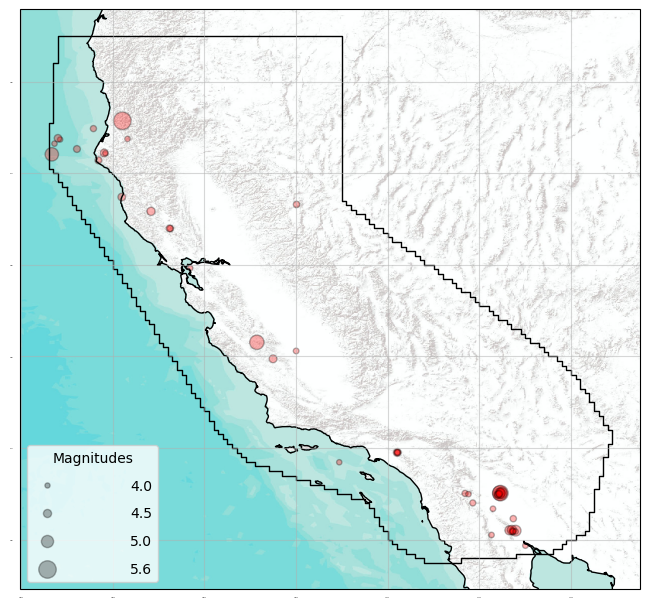

<GeoAxes: >

In [47]:
# set start and end date
start_time = csep.utils.time_utils.strptime_to_utc_datetime('2012-01-01 00:00:00.0')
end_time = csep.utils.time_utils.strptime_to_utc_datetime('2012-12-31 23:59:59.0')
# retrieve events in ComCat catalogue between start and end date
catalog = csep.query_comcat(start_time, end_time)

# set magnitude limits
min_mw = 3.95
max_mw = 8.95
# set magnitude bin length
dmw = 0.1

# Create space and magnitude regions. The forecast is already filtered in space and magnitude
magnitudes = csep.regions.magnitude_bins(min_mw, max_mw, dmw)
region = csep.regions.california_relm_region()

# Bind region information to the forecast
space_magnitude_region = csep.regions.create_space_magnitude_region(region, magnitudes)


# filter magnitude below 3.95
catalog.filter('magnitude >= 3.95')
# filter events outside spatial region
catalog.filter_spatial(space_magnitude_region)
# print summary information
print(catalog)

catalogEvents = catalog.to_dataframe()
catalog.plot(show=True)

### ETAS

In [48]:
## Load ETAS model
## start date: 01 Aug. 2007    end date: 30 Aug. 2018
## missing days: 0        min. magnitude: 3.95

# model path within the quatation marks **Depends on dowloading the forecast files and stored them in the data folder**
# file name is assumed to not have been renamed from download
etas_filename = '../data/ETAS_1day.hdf5'
# this will be a dictonary of pandas.DataFrames
ETAS = f_hdf5.load_hdf5_to_dict(etas_filename,
                                     start_date = '01/01/2012', # format dd/mm/yyyy
                                     end_date = '31/12/2012')

Loading year: 2012
Loading month: 1
Loading month: 10
Loading month: 11
Loading month: 12
Loading month: 2
Loading month: 3
Loading month: 4
Loading month: 5
Loading month: 6
Loading month: 7
Loading month: 8
Loading month: 9


#### Q-Score

In [49]:
#Initialize an empty list to store data
all_df = []
#Loop through the nested dictionary
for year, months in ETAS.items():
    for month, files in months.items():
        for file_, df in files.items():
            #Append the dataframe to the list
            all_df.append(df)
            
#combine all the dataframes in the files into a single dataframe
ETAS_forec = pd.concat(all_df, ignore_index = True)

#Optional to free memory space
del ETAS
del all_df

#Q Score Calculation with different percentage retention
print(QL.calculate_Q_score(fore_df= ETAS_forec,
                                cat_df = catalogEvents,
                                perc_retain = 0.05))

1.3083407


#### L-Score

In [50]:
print(QL.ell_score(fore_df= ETAS_forec,
                    cat_df = catalogEvents,))

#Optional to free memory space
del ETAS_forec

-295.56293


### STEP

In [51]:
## Load STEP model
## start date: 01 Aug. 2007    end date: 21 Jan. 2013
## missing days: 0        min. magnitude: 3.95

# model path within the quatation marks **Depends on dowloading the forecast files and stored them in the data folder**
# file name is assumed to not have been renamed from download
step_filename = '../data/STEP_1day.hdf5'
# this will be a dictonary of pandas.DataFrames
STEP = f_hdf5.load_hdf5_to_dict(step_filename,
                                     start_date = '01/01/2012', # format dd/mm/yyyy
                                     end_date = '31/12/2012')

Loading year: 2012
Loading month: 1
Loading month: 10
Loading month: 11
Loading month: 12
Loading month: 2
Loading month: 3
Loading month: 4
Loading month: 5
Loading month: 6
Loading month: 7
Loading month: 8
Loading month: 9


#### Q-Score

In [52]:
#Initialize an empty list to store data
all_df = []
#Loop through the nested dictionary
for year, months in STEP.items():
    for month, files in months.items():
        for file_, df in files.items():
            #Append the dataframe to the list
            all_df.append(df)
            
#combine all the dataframes in the files into a single dataframe
STEP_forec = pd.concat(all_df, ignore_index = True)

#Optional to free memory space
del STEP
del all_df

#Q Score Calculation with different percentage retention
print(QL.calculate_Q_score(fore_df= STEP_forec,
                                cat_df = catalogEvents,
                                perc_retain = 0.05))

3.1330402


#### L-Score

In [53]:
print(QL.ell_score(fore_df= STEP_forec,
                        cat_df = catalogEvents))
#Optional to free memory space
del STEP_forec

-178.90196


### STEPJAVA

In [54]:
## Load STEPJAVA model
## start date: 01 Sep. 2010    end date: 30 June 2018
## missing days: 0        min. magnitude: 3.95

# model path within the quatation marks **Depends on dowloading the forecast files and stored them in the data folder**
# file name is assumed to not have been renamed from download
STEPJAVA_filename = '../data/STEPJAVA_1day.hdf5'
# this will be a dictonary of pandas.DataFrames
STEPJAVA = f_hdf5.load_hdf5_to_dict(STEPJAVA_filename,
                                     start_date = '01/01/2012', # format dd/mm/yyy
                                     end_date = '31/12/2012')

Loading year: 2012
Loading month: 1
Loading month: 10
Loading month: 11
Loading month: 12
Loading month: 2
Loading month: 3
Loading month: 4
Loading month: 5
Loading month: 6
Loading month: 7
Loading month: 8
Loading month: 9


#### Q-Score

In [55]:
#Initialize an empty list to store data
all_df = []
#Loop through the nested dictionary
for year, months in STEPJAVA.items():
    for month, files in months.items():
        for file_, df in files.items():
            #Append the dataframe to the list
            all_df.append(df)
            
#combine all the dataframes in the files into a single dataframe
STEPJAVA_forec = pd.concat(all_df, ignore_index = True)

#Optional to free memory space
del STEPJAVA
del all_df

#Q Score Calculation with different percentage retention
print(QL.calculate_Q_score(fore_df= STEPJAVA_forec,
                            cat_df = catalogEvents,
                            perc_retain = 0.05))

3.4390044


#### L-Score

In [56]:
print(QL.ell_score(fore_df= STEPJAVA_forec,
                 cat_df = catalogEvents))

# add waterlevelto zero valued bins
print(QL.ell_score(fore_df= STEPJAVA_forec,
                 cat_df = catalogEvents,
                 waterlevel = 1e-6))

#Optional to free memory space
del STEPJAVA_forec

C:\Users\arjon\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


-inf
-259.42454567440916


C:\Users\arjon\OneDrive\Documents\S Score\Project\src\QandL.py:39: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1e-06' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  df_out.iloc[target_idx,6] = waterlevel


### KJSSOneDay

In [57]:
## Load KJSSOneDay model
## start date: 01 Jan. 2009    end date: 30 June 2018
## missing days: 0        min. magnitude: 3.95

# model path within the quatation marks **Depends on dowloading the forecast files and stored them in the data folder**
# file name is assumed to not have been renamed from download
KJSSOne_filename = '../data/KJSSOneDayCalifornia_1day.hdf5'
# this will be a dictonary of pandas.DataFrames
KJSSOne = f_hdf5.load_hdf5_to_dict(KJSSOne_filename,
                                     start_date = '01/01/2012', # format dd/mm/yyy
                                     end_date = '31/12/2012')

Loading year: 2012
Loading month: 1
Loading month: 10
Loading month: 11
Loading month: 12
Loading month: 2
Loading month: 3
Loading month: 4
Loading month: 5
Loading month: 6
Loading month: 7
Loading month: 8
Loading month: 9


#### Q-Score

In [58]:
#Initialize an empty list to store data
all_df = []
#Loop through the nested dictionary
for year, months in KJSSOne.items():
    for month, files in months.items():
        for file_, df in files.items():
            #Append the dataframe to the list
            all_df.append(df)
            
#combine all the dataframes in the files into a single dataframe
KJSSOne_forec = pd.concat(all_df, ignore_index = True)

#Optional to free memory space
del KJSSOne
del all_df

#Q Score Calculation with different percentage retention
print(QL.calculate_Q_score(fore_df= KJSSOne_forec,
                                cat_df = catalogEvents,
                                perc_retain = 0.05))

2.1022449


#### L-Score

In [59]:
print(QL.ell_score(fore_df= KJSSOne_forec,
                    cat_df = catalogEvents))

#Optional to free memory space
del KJSSOne_forec

-274.85934


## 2013

Fetched ComCat catalog in 3.857973337173462 seconds.

Downloaded catalog from ComCat with following parameters
Start Date: 2013-01-01 23:37:09.760000+00:00
End Date: 2013-12-31 12:33:24.330000+00:00
Min Latitude: 31.5003333 and Max Latitude: 42.967
Min Longitude: -125.3931667 and Max Longitude: -113.1058333
Min Magnitude: 2.5
Found 1174 events in the ComCat catalog.

        Name: None

        Start Date: 2013-01-13 10:28:17.650000+00:00
        End Date: 2013-12-26 00:18:19.630000+00:00

        Latitude: (32.132, 41.3256667)
        Longitude: (-125.316, -115.2148333)

        Min Mw: 3.95
        Max Mw: 5.69

        Event Count: 35
        


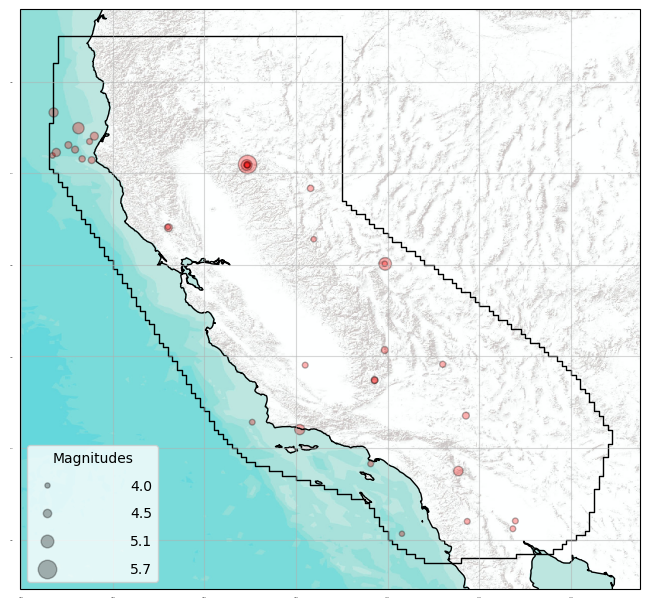

<GeoAxes: >

In [60]:
# set start and end date
start_time = csep.utils.time_utils.strptime_to_utc_datetime('2013-01-01 00:00:00.0')
end_time = csep.utils.time_utils.strptime_to_utc_datetime('2013-12-31 23:59:59.0')
# retrieve events in ComCat catalogue between start and end date
catalog = csep.query_comcat(start_time, end_time)

# set magnitude limits
min_mw = 3.95
max_mw = 8.95
# set magnitude bin length
dmw = 0.1

# Create space and magnitude regions. The forecast is already filtered in space and magnitude
magnitudes = csep.regions.magnitude_bins(min_mw, max_mw, dmw)
region = csep.regions.california_relm_region()

# Bind region information to the forecast
space_magnitude_region = csep.regions.create_space_magnitude_region(region, magnitudes)


# filter magnitude below 3.95
catalog.filter('magnitude >= 3.95')
# filter events outside spatial region
catalog.filter_spatial(space_magnitude_region)
# print summary information
print(catalog)

catalogEvents = catalog.to_dataframe()
catalog.plot(show=True)

### ETAS

In [61]:
## Load ETAS model
## start date: 01 Aug. 2007    end date: 30 Aug. 2018
## missing days: 0        min. magnitude: 3.95

# model path within the quatation marks **Depends on dowloading the forecast files and stored them in the data folder**
# file name is assumed to not have been renamed from download
etas_filename = '../data/ETAS_1day.hdf5'
# this will be a dictonary of pandas.DataFrames
ETAS = f_hdf5.load_hdf5_to_dict(etas_filename,
                                     start_date = '01/01/2013', # format dd/mm/yyyy
                                     end_date = '31/12/2013')

Loading year: 2013
Loading month: 1
Loading month: 10
Loading month: 11
Loading month: 12
Loading month: 2
Loading month: 3
Loading month: 4
Loading month: 5
Loading month: 6
Loading month: 7
Loading month: 8
Loading month: 9


#### Q-Score

In [62]:
#Initialize an empty list to store data
all_df = []
#Loop through the nested dictionary
for year, months in ETAS.items():
    for month, files in months.items():
        for file_, df in files.items():
            #Append the dataframe to the list
            all_df.append(df)
            
#combine all the dataframes in the files into a single dataframe
ETAS_forec = pd.concat(all_df, ignore_index = True)

#Optional to free memory space
del ETAS
del all_df

#Q Score Calculation with different percentage retention
print(QL.calculate_Q_score(fore_df= ETAS_forec,
                                cat_df = catalogEvents,
                                perc_retain = 0.05))

1.0945928


#### L-Score

In [63]:
print(QL.ell_score(fore_df= ETAS_forec,
                    cat_df = catalogEvents))

#Optional to free memory space
del ETAS_forec

-242.07106


### ETASV1.1

In [91]:
## Load ETASV1.1 model
## start date: 01 July 2012    end date: 30 June 2018
## missing days: 4      min. magnitude: 3.95

# model path within the quatation marks **Depends on dowloading the forecast files and stored them in the data folder**
# file name is assumed to not have been renamed from download
ETASV1_1_filename = '../data/ETASV1_1_1day.hdf5'
# this will be a dictonary of pandas.DataFrames
ETASV1_1 = f_hdf5.load_hdf5_to_dict(ETASV1_1_filename,
                                     start_date = '01/01/2013', # format dd/mm/yyy
                                     end_date = '31/12/2013')

Loading year: 2013
Loading month: 1
Loading month: 10
Loading month: 11
Loading month: 12
Loading month: 2
Loading month: 3
Loading month: 4
Loading month: 5
Loading month: 6
Loading month: 7
Loading month: 8
Loading month: 9


#### Q-Score

In [92]:
all_df = []
#Loop through the nested dictionary
for year, months in ETASV1_1.items():
    for month, files in months.items():
        for file_, df in files.items():
            #Append the dataframe to the list
            all_df.append(df)
            
#combine all the dataframes in the files into a single dataframe
ETASV1_1_forec = pd.concat(all_df, ignore_index = True)

#Optional to free memory space
del all_df
del ETASV1_1

#Q Score Calculation with different percentage retention
print(QL.calculate_Q_score(fore_df= ETASV1_1_forec,
                                cat_df = catalogEvents,
                                perc_retain = 0.05))

2.8001409


#### L-Score

In [93]:
print(QL.ell_score(fore_df= ETASV1_1_forec,
                    cat_df = catalogEvents))
#Optional to free memory space
del ETASV1_1_forec

-170.21208


### ETAS_DROneDayMd2

In [76]:
## Load ETAS_DROneDayMd2 model
## start date: 01 Oct. 2012    end date: 30 June 2018
## missing days: 17       min. magnitude: 3.95

# model path within the quatation marks **Depends on dowloading the forecast files and stored them in the data folder**
# file name is assumed to not have been renamed from download
ETAS_DROneDayMd2_filename = '../data/ETAS_DROneDayMd2_1day.hdf5'
# this will be a dictonary of pandas.DataFrames
ETAS_DROneDayMd2 = f_hdf5.load_hdf5_to_dict(ETAS_DROneDayMd2_filename,
                                     start_date = '01/01/2013', # format dd/mm/yyy
                                     end_date = '31/12/2013')

Loading year: 2013
Loading month: 1
Loading month: 10
Loading month: 11
Loading month: 12
Loading month: 2
Loading month: 3
Loading month: 4
Loading month: 5
Loading month: 6
Loading month: 7
Loading month: 8
Loading month: 9


#### Q-Score

In [77]:
all_df = []
#Loop through the nested dictionary
for year, months in ETAS_DROneDayMd2.items():
    for month, files in months.items():
        for file_, df in files.items():
            #Append the dataframe to the list
            all_df.append(df)
            
#combine all the dataframes in the files into a single dataframe
ETAS_DROneDayMd2_forec = pd.concat(all_df, ignore_index = True)

#Optional to free memory space
del ETAS_DROneDayMd2
del all_df

#Q Score Calculation with different percentage retention
print(QL.calculate_Q_score(fore_df= ETAS_DROneDayMd2_forec,
                                cat_df = catalogEvents,
                                perc_retain = 0.05))

3.3288572


#### L-Score

In [78]:
print(QL.ell_score(fore_df= ETAS_DROneDayMd2_forec,
                    cat_df = catalogEvents))
#Optional to free memory space
del ETAS_DROneDayMd2_forec

-165.19568


### ETAS_DROneDayMd3

In [73]:
## Load ETAS_DROneDayMd3 model
## start date: 01 Oct. 2012    end date: 30 June 2018
## missing days: 5       min. magnitude: 3.95

# model path within the quatation marks **Depends on dowloading the forecast files and stored them in the data folder**
# file name is assumed to not have been renamed from download
ETAS_DROneDayMd3_filename = '../data/ETAS_DROneDayMd3_1day.hdf5'
# this will be a dictonary of pandas.DataFrames
ETAS_DROneDayMd3 = f_hdf5.load_hdf5_to_dict(ETAS_DROneDayMd3_filename,
                                     start_date = '01/01/2013', # format dd/mm/yyy
                                     end_date = '31/12/2013')

Loading year: 2013
Loading month: 1
Loading month: 10
Loading month: 11
Loading month: 12
Loading month: 2
Loading month: 3
Loading month: 4
Loading month: 5
Loading month: 6
Loading month: 7
Loading month: 8
Loading month: 9


#### Q-Score

In [74]:
all_df = []
#Loop through the nested dictionary
for year, months in ETAS_DROneDayMd3.items():
    for month, files in months.items():
        for file_, df in files.items():
            #Append the dataframe to the list
            all_df.append(df)
            
#combine all the dataframes in the files into a single dataframe
ETAS_DROneDayMd3_forec = pd.concat(all_df, ignore_index = True)

#Optional to free memory space
del ETAS_DROneDayMd3
del all_df

#Q Score Calculation with different percentage retention
print(QL.calculate_Q_score(fore_df= ETAS_DROneDayMd3_forec,
                                cat_df = catalogEvents,
                                perc_retain = 0.05))

3.402239


#### L-Score

In [75]:
print(QL.ell_score(fore_df= ETAS_DROneDayMd3_forec,
                    cat_df = catalogEvents))
#Optional to free memory space
del ETAS_DROneDayMd3_forec

-161.70676


### ETAS_HWMd2

In [103]:
## Load ETAS_HWMd2 model
## start date: 01 Oct. 2012    end date: 19 Sep. 2016
## missing days: 0     min. magnitude: 3.95

# model path within the quatation marks **Depends on dowloading the forecast files and stored them in the data folder**
# file name is assumed to not have been renamed from download
ETAS_HWMd2_filename = '../data/ETAS_HWMd2_1day.hdf5'
# this will be a dictonary of pandas.DataFrames
ETAS_HWMd2 = f_hdf5.load_hdf5_to_dict(ETAS_HWMd2_filename,
                                     start_date = '01/01/2013', # format dd/mm/yyy
                                     end_date = '31/12/2013')

Loading year: 2013
Loading month: 1
Loading month: 10
Loading month: 11
Loading month: 12
Loading month: 2
Loading month: 3
Loading month: 4
Loading month: 5
Loading month: 6
Loading month: 7
Loading month: 8
Loading month: 9


#### Q-Score

In [104]:
all_df = []
#Loop through the nested dictionary
for year, months in ETAS_HWMd2.items():
    for month, files in months.items():
        for file_, df in files.items():
            #Append the dataframe to the list
            all_df.append(df)
            
#combine all the dataframes in the files into a single dataframe
ETAS_HWMd2_forec = pd.concat(all_df, ignore_index = True)

#Optional to free memory space
del all_df
del ETAS_HWMd2

print(QL.calculate_Q_score(fore_df= ETAS_HWMd2_forec,
                                cat_df = catalogEvents,
                                perc_retain = 0.05))

2.725862


#### L-Score

In [105]:
print(QL.ell_score(fore_df= ETAS_HWMd2_forec,
                    cat_df = catalogEvents))
#Optional to free memory space
del ETAS_HWMd2_forec

-164.77116


### ETAS_HWMd3

In [88]:
## Load ETAS_HWMd3 model
## start date: 01 Oct. 2012    end date: 30 June 2018
## missing days: 5      min. magnitude: 3.95

# model path within the quatation marks **Depends on dowloading the forecast files and stored them in the data folder**
# file name is assumed to not have been renamed from download
ETAS_HWMd3_filename = '../data/ETAS_HWMd3_1day.hdf5'
# this will be a dictonary of pandas.DataFrames
ETAS_HWMd3 = f_hdf5.load_hdf5_to_dict(ETAS_HWMd3_filename,
                                     start_date = '01/01/2013', # format dd/mm/yyy
                                     end_date = '31/12/2013')

Loading year: 2013
Loading month: 1
Loading month: 10
Loading month: 11
Loading month: 12
Loading month: 2
Loading month: 3
Loading month: 4
Loading month: 5
Loading month: 6
Loading month: 7
Loading month: 8
Loading month: 9


#### Q-Score

In [89]:
all_df = []
#Loop through the nested dictionary
for year, months in ETAS_HWMd3.items():
    for month, files in months.items():
        for file_, df in files.items():
            #Append the dataframe to the list
            all_df.append(df)
            
#combine all the dataframes in the files into a single dataframe
ETAS_HWMd3_forec = pd.concat(all_df, ignore_index = True)

#Optional to free memory space
del ETAS_HWMd3
del all_df

#Q Score Calculation with different percentage retention
print(QL.calculate_Q_score(fore_df= ETAS_HWMd3_forec,
                                cat_df = catalogEvents,
                                perc_retain = 0.05))

2.9237862


#### L-Score

In [90]:
print(QL.ell_score(fore_df= ETAS_HWMd3_forec,
                     cat_df = catalogEvents))
#Optional to free memory space
del ETAS_HWMd3_forec

-164.83995


### STEPJAVA

In [67]:
## Load STEPJAVA model
## start date: 01 Sep. 2010    end date: 30 June 2018
## missing days: 0        min. magnitude: 3.95

# model path within the quatation marks **Depends on dowloading the forecast files and stored them in the data folder**
# file name is assumed to not have been renamed from download
STEPJAVA_filename = '../data/STEPJAVA_1day.hdf5'
# this will be a dictonary of pandas.DataFrames
STEPJAVA = f_hdf5.load_hdf5_to_dict(STEPJAVA_filename,
                                     start_date = '01/01/2013', # format dd/mm/yyy
                                     end_date = '31/12/2013')

Loading year: 2013
Loading month: 1
Loading month: 10
Loading month: 11
Loading month: 12
Loading month: 2
Loading month: 3
Loading month: 4
Loading month: 5
Loading month: 6
Loading month: 7
Loading month: 8
Loading month: 9


#### Q-Score

In [68]:
#Initialize an empty list to store data
all_df = []
#Loop through the nested dictionary
for year, months in STEPJAVA.items():
    for month, files in months.items():
        for file_, df in files.items():
            #Append the dataframe to the list
            all_df.append(df)
            
#combine all the dataframes in the files into a single dataframe
STEPJAVA_forec = pd.concat(all_df, ignore_index = True)

#Optional to free memory space
del STEPJAVA
del all_df

#Q Score Calculation with different percentage retention
print(QL.calculate_Q_score(fore_df= STEPJAVA_forec,
                                cat_df = catalogEvents,
                                perc_retain = 0.05))

3.32946


#### L-Score

In [69]:
print(QL.ell_score(fore_df= STEPJAVA_forec,
                 cat_df = catalogEvents))

# add waterlevelto zero valued bins
print(QL.ell_score(fore_df= STEPJAVA_forec,
                 cat_df = catalogEvents,
                 waterlevel = 1e-6))

#Optional to free memory space
del STEPJAVA_forec

C:\Users\arjon\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


-inf
-229.90321807193112


C:\Users\arjon\OneDrive\Documents\S Score\Project\src\QandL.py:39: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1e-06' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  df_out.iloc[target_idx,6] = waterlevel


### KJSSOneDay

In [64]:
## Load KJSSOneDay model
## start date: 01 Jan. 2009    end date: 30 June 2018
## missing days: 0        min. magnitude: 3.95

# model path within the quatation marks **Depends on dowloading the forecast files and stored them in the data folder**
# file name is assumed to not have been renamed from download
KJSSOne_filename = '../data/KJSSOneDayCalifornia_1day.hdf5'
# this will be a dictonary of pandas.DataFrames
KJSSOne = f_hdf5.load_hdf5_to_dict(KJSSOne_filename,
                                     start_date = '01/01/2013', # format dd/mm/yyy
                                     end_date = '31/12/2013')

Loading year: 2013
Loading month: 1
Loading month: 10
Loading month: 11
Loading month: 12
Loading month: 2
Loading month: 3
Loading month: 4
Loading month: 5
Loading month: 6
Loading month: 7
Loading month: 8
Loading month: 9


#### Q-Score

In [65]:
#Initialize an empty list to store data
all_df = []
#Loop through the nested dictionary
for year, months in KJSSOne.items():
    for month, files in months.items():
        for file_, df in files.items():
            #Append the dataframe to the list
            all_df.append(df)
            
#combine all the dataframes in the files into a single dataframe
KJSSOne_forec = pd.concat(all_df, ignore_index = True)

#Optional to free memory space
del KJSSOne
del all_df

#Q Score Calculation with different percentage retention
print(QL.calculate_Q_score(fore_df= KJSSOne_forec,
                                cat_df = catalogEvents,
                                perc_retain = 0.05))

2.8443582


#### L-Score

In [66]:
print(QL.ell_score(fore_df= KJSSOne_forec,
                    cat_df = catalogEvents))

#Optional to free memory space
del KJSSOne_forec

-197.21999


### K3Md2

In [106]:
## Load K3Md2 Model model
## start date: 01 Oct. 2012    end date: 19 Sep. 2016
## missing days: 0     min. magnitude: 3.95

# model path within the quatation marks **Depends on dowloading the forecast files and stored them in the data folder**
# file name is assumed to not have been renamed from download
K3Md2_filename = '../data/K3Md2_1day.hdf5'
# this will be a dictonary of pandas.DataFrames
K3Md2 = f_hdf5.load_hdf5_to_dict(K3Md2_filename,
                                     start_date = '01/01/2013', # format dd/mm/yyy
                                     end_date = '31/12/2013') 

Loading year: 2013
Loading month: 1
Loading month: 10
Loading month: 11
Loading month: 12
Loading month: 2
Loading month: 3
Loading month: 4
Loading month: 5
Loading month: 6
Loading month: 7
Loading month: 8
Loading month: 9


#### Q-Score

In [107]:
all_df = []
#Loop through the nested dictionary
for year, months in K3Md2.items():
    for month, files in months.items():
        for file_, df in files.items():
            #Append the dataframe to the list
            all_df.append(df)
            
#combine all the dataframes in the files into a single dataframe
K3Md2_forec = pd.concat(all_df, ignore_index = True)

#Optional to free memory space
del all_df
del K3Md2

print(QL.calculate_Q_score(fore_df= K3Md2_forec,
                                cat_df = catalogEvents,
                                perc_retain = 0.05))

2.4439728


#### L-Score

In [108]:
print(QL.ell_score(fore_df= K3Md2_forec,
                    cat_df = catalogEvents))
#Optional to free memory space
del K3Md2_forec

-195.63097


### K3Md3

In [70]:
## Load K3Md3 model
## start date: 01 Oct. 2012    end date: 30 June 2018
## missing days: 5       min. magnitude: 3.95

# model path within the quatation marks **Depends on dowloading the forecast files and stored them in the data folder**
# file name is assumed to not have been renamed from download
K3Md3_filename = '../data/K3Md3_1day.hdf5'
# this will be a dictonary of pandas.DataFrames
K3Md3 = f_hdf5.load_hdf5_to_dict(K3Md3_filename,
                                     start_date = '01/01/2013', # format dd/mm/yyy
                                     end_date = '31/12/2013')

Loading year: 2013
Loading month: 1
Loading month: 10
Loading month: 11
Loading month: 12
Loading month: 2
Loading month: 3
Loading month: 4
Loading month: 5
Loading month: 6
Loading month: 7
Loading month: 8
Loading month: 9


#### Q-Score

In [71]:
all_df = []
#Loop through the nested dictionary
for year, months in K3Md3.items():
    for month, files in months.items():
        for file_, df in files.items():
            #Append the dataframe to the list
            all_df.append(df)
            
#combine all the dataframes in the files into a single dataframe
K3Md3_forec = pd.concat(all_df, ignore_index = True)

#Optional to free memory space
del K3Md3
del all_df

#Q Score Calculation with different percentage retention
print(QL.calculate_Q_score(fore_df= K3Md3_forec,
                                cat_df = catalogEvents,
                                perc_retain = 0.05))

2.1440442


#### L-Score

In [72]:
print(QL.ell_score(fore_df= K3Md3_forec,
                    cat_df = catalogEvents))
#Optional to free memory space
del K3Md3_forec

-202.26434


### ETAS_DROneDayPPEMd2

In [82]:
## Load ETAS_DROneDayPPEMd2 model
## start date: 01 Oct. 2012    end date: 30 June 2018
## missing days: 18      min. magnitude: 3.95

# model path within the quatation marks **Depends on dowloading the forecast files and stored them in the data folder**
# file name is assumed to not have been renamed from download
ETAS_DROneDayPPEMd2_filename = '../data/ETAS_DROneDayPPEMd2_1day.hdf5'
# this will be a dictonary of pandas.DataFrames
ETAS_DROneDayPPEMd2 = f_hdf5.load_hdf5_to_dict(ETAS_DROneDayPPEMd2_filename,
                                     start_date = '01/01/2013', # format dd/mm/yyy
                                     end_date = '31/12/2013')

Loading year: 2013
Loading month: 1
Loading month: 10
Loading month: 11
Loading month: 12
Loading month: 2
Loading month: 3
Loading month: 4
Loading month: 5
Loading month: 6
Loading month: 7
Loading month: 8
Loading month: 9


#### Q-Score

In [83]:
all_df = []
#Loop through the nested dictionary
for year, months in ETAS_DROneDayPPEMd2.items():
    for month, files in months.items():
        for file_, df in files.items():
            #Append the dataframe to the list
            all_df.append(df)
            
#combine all the dataframes in the files into a single dataframe
ETAS_DROneDayPPEMd2_forec = pd.concat(all_df, ignore_index = True)

#Optional to free memory space
del ETAS_DROneDayPPEMd2
del all_df

#Q Score Calculation with different percentage retention
print(QL.calculate_Q_score(fore_df= ETAS_DROneDayPPEMd2_forec,
                                cat_df = catalogEvents,
                                perc_retain = 0.05))

1.0290474


#### L-Score

In [84]:
print(QL.ell_score(fore_df= ETAS_DROneDayPPEMd2_forec,
                    cat_df = catalogEvents))
#Optional to free memory space
del ETAS_DROneDayPPEMd2_forec

-253.79436


### ETAS_DROneDayPPEMd3

In [79]:
## Load ETAS_DROneDayPPEMd3 model
## start date: 01 Oct. 2012    end date: 30 June 2018
## missing days: 6      min. magnitude: 3.95

# model path within the quatation marks **Depends on dowloading the forecast files and stored them in the data folder**
# file name is assumed to not have been renamed from download
ETAS_DROneDayPPEMd3_filename = '../data/ETAS_DROneDayPPEMd3_1day.hdf5'
# this will be a dictonary of pandas.DataFrames
ETAS_DROneDayPPEMd3 = f_hdf5.load_hdf5_to_dict(ETAS_DROneDayPPEMd3_filename,
                                     start_date = '01/01/2013', # format dd/mm/yyy
                                     end_date = '31/12/2013')

Loading year: 2013
Loading month: 1
Loading month: 10
Loading month: 11
Loading month: 12
Loading month: 2
Loading month: 3
Loading month: 4
Loading month: 5
Loading month: 6
Loading month: 7
Loading month: 8
Loading month: 9


#### Q-Score

In [80]:
all_df = []
#Loop through the nested dictionary
for year, months in ETAS_DROneDayPPEMd3.items():
    for month, files in months.items():
        for file_, df in files.items():
            #Append the dataframe to the list
            all_df.append(df)
            
#combine all the dataframes in the files into a single dataframe
ETAS_DROneDayPPEMd3_forec = pd.concat(all_df, ignore_index = True)

#Optional to free memory space
del ETAS_DROneDayPPEMd3
del all_df

#Q Score Calculation with different percentage retention
print(QL.calculate_Q_score(fore_df= ETAS_DROneDayPPEMd3_forec,
                                cat_df = catalogEvents,
                                perc_retain = 0.05))

0.9752982


#### L-Score

In [81]:
print(QL.ell_score(fore_df= ETAS_DROneDayPPEMd3_forec,
                    cat_df = catalogEvents))
#Optional to free memory space
del ETAS_DROneDayPPEMd3_forec

-237.91371


### ETAS_HW_K3_AVERAGE_Md2

In [100]:
## Load ETAS_HW_K3_AVERAGE_Md2 model
## start date: 01 Oct. 2012    end date: 19 Sep. 2016
## missing days: 1     min. magnitude: 3.95

# model path within the quatation marks **Depends on dowloading the forecast files and stored them in the data folder**
# file name is assumed to not have been renamed from download
ETAS_HW_K3_AVERAGE_Md2_filename = '../data/ETAS_HW_K3_AVERAGE_Md2_1day.hdf5'
# this will be a dictonary of pandas.DataFrames
ETAS_HW_K3_AVERAGE_Md2 = f_hdf5.load_hdf5_to_dict(ETAS_HW_K3_AVERAGE_Md2_filename,
                                     start_date = '01/01/2013', # format dd/mm/yyy
                                     end_date = '31/12/2013') 

Loading year: 2013
Loading month: 1
Loading month: 10
Loading month: 11
Loading month: 12
Loading month: 2
Loading month: 3
Loading month: 4
Loading month: 5
Loading month: 6
Loading month: 7
Loading month: 8
Loading month: 9


#### Q-Score

In [101]:
all_df = []
#Loop through the nested dictionary
for year, months in ETAS_HW_K3_AVERAGE_Md2.items():
    for month, files in months.items():
        for file_, df in files.items():
            #Append the dataframe to the list
            all_df.append(df)
            
#combine all the dataframes in the files into a single dataframe
ETAS_HW_K3_AVERAGE_Md2_forec = pd.concat(all_df, ignore_index = True)

#Optional to free memory space
del all_df
del ETAS_HW_K3_AVERAGE_Md2

print(QL.calculate_Q_score(fore_df= ETAS_HW_K3_AVERAGE_Md2_forec,
                                cat_df = catalogEvents,
                                perc_retain = 0.05))

2.6091936


#### L-Score

In [102]:
print(QL.ell_score(fore_df= ETAS_HW_K3_AVERAGE_Md2_forec,
                  cat_df = catalogEvents))
#Optional to free memory space
del ETAS_HW_K3_AVERAGE_Md2_forec

-174.19962


### ETAS_HW_K3_AVERAGE_Md3

In [85]:
## Load ETAS_HW_K3_AVERAGE_Md3 model
## start date: 01 Oct. 2012    end date: 30 June 2018
## missing days: 23      min. magnitude: 3.95

# model path within the quatation marks **Depends on dowloading the forecast files and stored them in the data folder**
# file name is assumed to not have been renamed from download
ETAS_HW_K3_AVERAGE_Md3_filename = '../data/ETAS_HW_K3_AVERAGE_Md3_1day.hdf5'
# this will be a dictonary of pandas.DataFrames
ETAS_HW_K3_AVERAGE_Md3 = f_hdf5.load_hdf5_to_dict(ETAS_HW_K3_AVERAGE_Md3_filename,
                                     start_date = '01/01/2013', # format dd/mm/yyy
                                     end_date = '31/12/2013')

Loading year: 2013
Loading month: 1
Loading month: 10
Loading month: 11
Loading month: 12
Loading month: 2
Loading month: 3
Loading month: 4
Loading month: 5
Loading month: 6
Loading month: 7
Loading month: 8
Loading month: 9


#### Q-Score

In [86]:
all_df = []
#Loop through the nested dictionary
for year, months in ETAS_HW_K3_AVERAGE_Md3.items():
    for month, files in months.items():
        for file_, df in files.items():
            #Append the dataframe to the list
            all_df.append(df)
            
#combine all the dataframes in the files into a single dataframe
ETAS_HW_K3_AVERAGE_Md3_forec = pd.concat(all_df, ignore_index = True)

#Optional to free memory space
del ETAS_HW_K3_AVERAGE_Md3
del all_df

#Q Score Calculation with different percentage retention
print(QL.calculate_Q_score(fore_df= ETAS_HW_K3_AVERAGE_Md3_forec,
                                cat_df = catalogEvents,
                                perc_retain = 0.05))

2.6847548


#### L-Score

In [87]:
print(QL.ell_score(fore_df= ETAS_HW_K3_AVERAGE_Md3_forec,
                    cat_df = catalogEvents))
#Optional to free memory space
del ETAS_HW_K3_AVERAGE_Md3_forec

-176.58705


### OneDayBayesianBMA

In [94]:
## Load OneDayBayesianBMA model
## start date: 01 July 2012    end date: 07 Aug. 2016
## missing days: 0     min. magnitude: 3.95

# model path within the quatation marks **Depends on dowloading the forecast files and stored them in the data folder**
# file name is assumed to not have been renamed from download
OneDayBayesianBMA_filename = '../data/OneDayBayesianBMA_1day.hdf5'
# this will be a dictonary of pandas.DataFrames
OneDayBayesianBMA = f_hdf5.load_hdf5_to_dict(OneDayBayesianBMA_filename,
                                     start_date = '01/01/2013', # format dd/mm/yyy
                                     end_date = '31/12/2013')

Loading year: 2013
Loading month: 1
Loading month: 10
Loading month: 11
Loading month: 12
Loading month: 2
Loading month: 3
Loading month: 4
Loading month: 5
Loading month: 6
Loading month: 7
Loading month: 8
Loading month: 9


#### Q-Score

In [95]:
all_df = []
#Loop through the nested dictionary
for year, months in OneDayBayesianBMA.items():
    for month, files in months.items():
        for file_, df in files.items():
            #Append the dataframe to the list
            all_df.append(df)
            
#combine all the dataframes in the files into a single dataframe
OneDayBayesianBMA_forec = pd.concat(all_df, ignore_index = True)

#Optional to free memory space
del all_df
del OneDayBayesianBMA

print(QL.calculate_Q_score(fore_df= OneDayBayesianBMA_forec,
                                cat_df = catalogEvents,
                                perc_retain = 0.05))

2.8003397


#### L-Score

In [96]:
print(QL.ell_score(fore_df= OneDayBayesianBMA_forec,
                    cat_df = catalogEvents))
#Optional to free memory space
del OneDayBayesianBMA_forec

-170.21939


### OneDayBayesianSeqBMA

In [97]:
## Load OneDayBayesianSeqBMA model
## start date: 01 July 2012    end date: 07 Aug. 2016
## missing days: 0     min. magnitude: 3.95

# model path within the quatation marks **Depends on dowloading the forecast files and stored them in the data folder**
# file name is assumed to not have been renamed from download
OneDayBayesianSeqBMA_filename = '../data/OneDayBayesianSeqBMA_1day.hdf5'
# this will be a dictonary of pandas.DataFrames
OneDayBayesianSeqBMA = f_hdf5.load_hdf5_to_dict(OneDayBayesianSeqBMA_filename,
                                     start_date = '01/01/2013', # format dd/mm/yyy
                                     end_date = '31/12/2013')

Loading year: 2013
Loading month: 1
Loading month: 10
Loading month: 11
Loading month: 12
Loading month: 2
Loading month: 3
Loading month: 4
Loading month: 5
Loading month: 6
Loading month: 7
Loading month: 8
Loading month: 9


#### Q-Score

In [98]:
all_df = []
#Loop through the nested dictionary
for year, months in OneDayBayesianSeqBMA.items():
    for month, files in months.items():
        for file_, df in files.items():
            #Append the dataframe to the list
            all_df.append(df)
            
#combine all the dataframes in the files into a single dataframe
OneDayBayesianSeqBMA_forec = pd.concat(all_df, ignore_index = True)

#Optional to free memory space
del all_df
del OneDayBayesianSeqBMA

print(QL.calculate_Q_score(fore_df= OneDayBayesianSeqBMA_forec,
                                cat_df = catalogEvents,
                                perc_retain = 0.05))

2.8003066


#### L-Score

In [99]:
print(QL.ell_score(fore_df= OneDayBayesianSeqBMA_forec,
                    cat_df = catalogEvents))
#Optional to free memory space
del OneDayBayesianSeqBMA_forec

-170.21805


## 2014

Fetched ComCat catalog in 2.896602153778076 seconds.

Downloaded catalog from ComCat with following parameters
Start Date: 2014-01-01 15:47:16.460000+00:00
End Date: 2014-12-31 09:01:13.130000+00:00
Min Latitude: 31.5005 and Max Latitude: 42.6121667
Min Longitude: -125.3946667 and Max Longitude: -113.2118
Min Magnitude: 2.5
Found 1521 events in the ComCat catalog.

        Name: None

        Start Date: 2014-01-02 06:23:09.700000+00:00
        End Date: 2014-12-24 05:51:51.440000+00:00

        Latitude: (32.2121667, 41.9278)
        Longitude: (-125.3838333, -115.6085)

        Min Mw: 3.95
        Max Mw: 6.8

        Event Count: 44
        


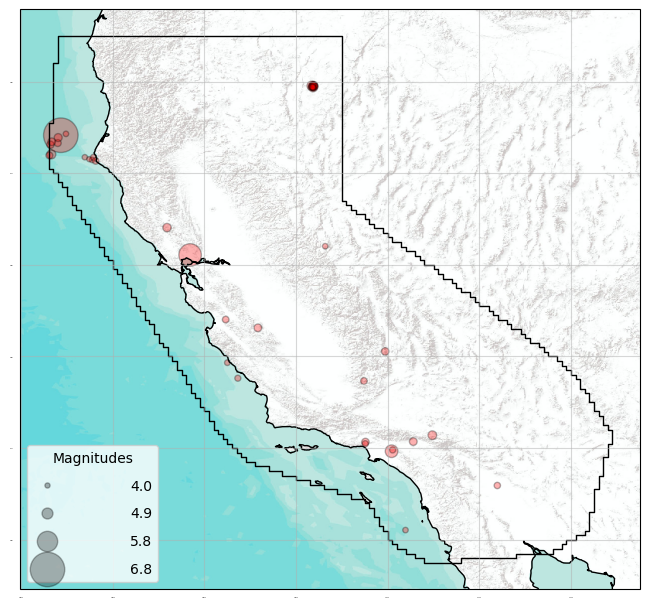

<GeoAxes: >

In [109]:
# set start and end date
start_time = csep.utils.time_utils.strptime_to_utc_datetime('2014-01-01 00:00:00.0')
end_time = csep.utils.time_utils.strptime_to_utc_datetime('2014-12-31 23:59:59.0')
# retrieve events in ComCat catalogue between start and end date
catalog = csep.query_comcat(start_time, end_time)

# set magnitude limits
min_mw = 3.95
max_mw = 8.95
# set magnitude bin length
dmw = 0.1

# Create space and magnitude regions. The forecast is already filtered in space and magnitude
magnitudes = csep.regions.magnitude_bins(min_mw, max_mw, dmw)
region = csep.regions.california_relm_region()

# Bind region information to the forecast
space_magnitude_region = csep.regions.create_space_magnitude_region(region, magnitudes)


# filter magnitude below 3.95
catalog.filter('magnitude >= 3.95')
# filter events outside spatial region
catalog.filter_spatial(space_magnitude_region)
# print summary information
print(catalog)

catalogEvents = catalog.to_dataframe()
catalog.plot(show=True)

### ETAS

In [110]:
## Load ETAS model
## start date: 01 Aug. 2007    end date: 30 Aug. 2018
## missing days: 0        min. magnitude: 3.95

# model path within the quatation marks **Depends on dowloading the forecast files and stored them in the data folder**
# file name is assumed to not have been renamed from download
etas_filename = '../data/ETAS_1day.hdf5'
# this will be a dictonary of pandas.DataFrames
ETAS = f_hdf5.load_hdf5_to_dict(etas_filename,
                                     start_date = '01/01/2014', # format dd/mm/yyyy
                                     end_date = '31/12/2014')

Loading year: 2014
Loading month: 1
Loading month: 10
Loading month: 11
Loading month: 12
Loading month: 2
Loading month: 3
Loading month: 4
Loading month: 5
Loading month: 6
Loading month: 7
Loading month: 8
Loading month: 9


#### Q-Score

In [111]:
#Initialize an empty list to store data
all_df = []
#Loop through the nested dictionary
for year, months in ETAS.items():
    for month, files in months.items():
        for file_, df in files.items():
            #Append the dataframe to the list
            all_df.append(df)
            
#combine all the dataframes in the files into a single dataframe
ETAS_forec = pd.concat(all_df, ignore_index = True)

#Optional to free memory space
del ETAS
del all_df

#Q Score Calculation with different percentage retention
print(QL.calculate_Q_score(fore_df= ETAS_forec,
                                cat_df = catalogEvents,
                                perc_retain = 0.05))

1.6192876


#### L-Score

In [112]:
print(QL.ell_score(fore_df= ETAS_forec,
                    cat_df = catalogEvents))

#Optional to free memory space
del ETAS_forec

-281.8713


### ETASV1.1

In [140]:
## Load ETASV1.1 model
## start date: 01 July 2012    end date: 30 June 2018
## missing days: 4      min. magnitude: 3.95

# model path within the quatation marks **Depends on dowloading the forecast files and stored them in the data folder**
# file name is assumed to not have been renamed from download
ETASV1_1_filename = '../data/ETASV1_1_1day.hdf5'
# this will be a dictonary of pandas.DataFrames
ETASV1_1 = f_hdf5.load_hdf5_to_dict(ETASV1_1_filename,
                                     start_date = '01/01/2014', # format dd/mm/yyy
                                     end_date = '31/12/2014')

Loading year: 2014
Loading month: 1
Loading month: 10
Loading month: 11
Loading month: 12
Loading month: 2
Loading month: 3
Loading month: 4
Loading month: 5
Loading month: 6
Loading month: 7
Loading month: 8
Loading month: 9


#### Q-Score

In [141]:
all_df = []
#Loop through the nested dictionary
for year, months in ETASV1_1.items():
    for month, files in months.items():
        for file_, df in files.items():
            #Append the dataframe to the list
            all_df.append(df)
            
#combine all the dataframes in the files into a single dataframe
ETASV1_1_forec = pd.concat(all_df, ignore_index = True)

#Optional to free memory space
del all_df
del ETASV1_1

#Q Score Calculation with different percentage retention
print(QL.calculate_Q_score(fore_df= ETASV1_1_forec,
                                cat_df = catalogEvents,
                                perc_retain = 0.05))

2.6353881


#### L-Score

In [142]:
print(QL.ell_score(fore_df= ETASV1_1_forec,
                    cat_df = catalogEvents))
#Optional to free memory space
del ETASV1_1_forec

-186.90817


### ETAS_DROneDayMd2

In [125]:
## Load ETAS_DROneDayMd2 model
## start date: 01 Oct. 2012    end date: 30 June 2018
## missing days: 17       min. magnitude: 3.95

# model path within the quatation marks **Depends on dowloading the forecast files and stored them in the data folder**
# file name is assumed to not have been renamed from download
ETAS_DROneDayMd2_filename = '../data/ETAS_DROneDayMd2_1day.hdf5'
# this will be a dictonary of pandas.DataFrames
ETAS_DROneDayMd2 = f_hdf5.load_hdf5_to_dict(ETAS_DROneDayMd2_filename,
                                     start_date = '01/01/2014', # format dd/mm/yyy
                                     end_date = '31/12/2014')

Loading year: 2014
Loading month: 1
Loading month: 10
Loading month: 11
Loading month: 12
Loading month: 2
Loading month: 3
Loading month: 4
Loading month: 5
Loading month: 6
Loading month: 7
Loading month: 8
Loading month: 9


#### Q-Score

In [126]:
all_df = []
#Loop through the nested dictionary
for year, months in ETAS_DROneDayMd2.items():
    for month, files in months.items():
        for file_, df in files.items():
            #Append the dataframe to the list
            all_df.append(df)
            
#combine all the dataframes in the files into a single dataframe
ETAS_DROneDayMd2_forec = pd.concat(all_df, ignore_index = True)

#Optional to free memory space
del all_df
del ETAS_DROneDayMd2

#Q Score Calculation with different percentage retention
print(QL.calculate_Q_score(fore_df= ETAS_DROneDayMd2_forec,
                                cat_df = catalogEvents,
                                perc_retain = 0.05))

3.8716273


#### L-Score

In [127]:
print(QL.ell_score(fore_df= ETAS_DROneDayMd2_forec,
                    cat_df = catalogEvents))
#Optional to free memory space
del ETAS_DROneDayMd2_forec

-177.07307


### ETAS_DROneDayMd3

In [122]:
## Load ETAS_DROneDayMd3 model
## start date: 01 Oct. 2012    end date: 30 June 2018
## missing days: 5       min. magnitude: 3.95

# model path within the quatation marks **Depends on dowloading the forecast files and stored them in the data folder**
# file name is assumed to not have been renamed from download
ETAS_DROneDayMd3_filename = '../data/ETAS_DROneDayMd3_1day.hdf5'
# this will be a dictonary of pandas.DataFrames
ETAS_DROneDayMd3 = f_hdf5.load_hdf5_to_dict(ETAS_DROneDayMd3_filename,
                                     start_date = '01/01/2014', # format dd/mm/yyy
                                     end_date = '31/12/2014')

Loading year: 2014
Loading month: 1
Loading month: 10
Loading month: 11
Loading month: 12
Loading month: 2
Loading month: 3
Loading month: 4
Loading month: 5
Loading month: 6
Loading month: 7
Loading month: 8
Loading month: 9


#### Q-Score

In [123]:
all_df = []
#Loop through the nested dictionary
for year, months in ETAS_DROneDayMd3.items():
    for month, files in months.items():
        for file_, df in files.items():
            #Append the dataframe to the list
            all_df.append(df)
            
#combine all the dataframes in the files into a single dataframe
ETAS_DROneDayMd3_forec = pd.concat(all_df, ignore_index = True)

#Optional to free memory space
del all_df
del ETAS_DROneDayMd3

#Q Score Calculation with different percentage retention
print(QL.calculate_Q_score(fore_df= ETAS_DROneDayMd3_forec,
                                cat_df = catalogEvents,
                                perc_retain = 0.05))

5.055212


#### L-Score

In [124]:
print(QL.ell_score(fore_df= ETAS_DROneDayMd3_forec,
                    cat_df = catalogEvents))
#Optional to free memory space
del ETAS_DROneDayMd3_forec

-180.12727


### ETAS_HWMd2

In [152]:
## Load ETAS_HWMd2 model
## start date: 01 Oct. 2012    end date: 19 Sep. 2016
## missing days: 0     min. magnitude: 3.95

# model path within the quatation marks **Depends on dowloading the forecast files and stored them in the data folder**
# file name is assumed to not have been renamed from download
ETAS_HWMd2_filename = '../data/ETAS_HWMd2_1day.hdf5'
# this will be a dictonary of pandas.DataFrames
ETAS_HWMd2 = f_hdf5.load_hdf5_to_dict(ETAS_HWMd2_filename,
                                     start_date = '01/01/2014', # format dd/mm/yyy
                                     end_date = '31/12/2014')

Loading year: 2014
Loading month: 1
Loading month: 10
Loading month: 11
Loading month: 12
Loading month: 2
Loading month: 3
Loading month: 4
Loading month: 5
Loading month: 6
Loading month: 7
Loading month: 8
Loading month: 9


#### Q-Score

In [153]:
all_df = []
#Loop through the nested dictionary
for year, months in ETAS_HWMd2.items():
    for month, files in months.items():
        for file_, df in files.items():
            #Append the dataframe to the list
            all_df.append(df)
            
#combine all the dataframes in the files into a single dataframe
ETAS_HWMd2_forec = pd.concat(all_df, ignore_index = True)

#Optional to free memory space
del all_df
del ETAS_HWMd2

print(QL.calculate_Q_score(fore_df= ETAS_HWMd2_forec,
                                cat_df = catalogEvents,
                                perc_retain = 0.05))

0.7055646


#### L-Score

In [154]:
print(QL.ell_score(fore_df= ETAS_HWMd2_forec,
                    cat_df = catalogEvents))
#Optional to free memory space
del ETAS_HWMd2_forec

-164.50772


### ETAS_HWMd3

In [137]:
## Load ETAS_HWMd3 model
## start date: 01 Oct. 2012    end date: 30 June 2018
## missing days: 5      min. magnitude: 3.95

# model path within the quatation marks **Depends on dowloading the forecast files and stored them in the data folder**
# file name is assumed to not have been renamed from download
ETAS_HWMd3_filename = '../data/ETAS_HWMd3_1day.hdf5'
# this will be a dictonary of pandas.DataFrames
ETAS_HWMd3 = f_hdf5.load_hdf5_to_dict(ETAS_HWMd3_filename,
                                     start_date = '01/01/2014', # format dd/mm/yyy
                                     end_date = '31/12/2014')

Loading year: 2014
Loading month: 1
Loading month: 10
Loading month: 11
Loading month: 12
Loading month: 2
Loading month: 3
Loading month: 4
Loading month: 5
Loading month: 6
Loading month: 7
Loading month: 8
Loading month: 9


#### Q-Score

In [138]:
all_df = []
#Loop through the nested dictionary
for year, months in ETAS_HWMd3.items():
    for month, files in months.items():
        for file_, df in files.items():
            #Append the dataframe to the list
            all_df.append(df)
            
#combine all the dataframes in the files into a single dataframe
ETAS_HWMd3_forec = pd.concat(all_df, ignore_index = True)

#Optional to free memory space
del all_df
del ETAS_HWMd3

#Q Score Calculation with different percentage retention
print(QL.calculate_Q_score(fore_df= ETAS_HWMd3_forec,
                                cat_df = catalogEvents,
                                perc_retain = 0.05))

0.81535846


#### L-Score

In [139]:
print(QL.ell_score(fore_df= ETAS_HWMd3_forec,
                     cat_df = catalogEvents))
#Optional to free memory space
del ETAS_HWMd3_forec

-161.50389


### STEPJAVA

In [116]:
## Load STEPJAVA model
## start date: 01 Sep. 2010    end date: 30 June 2018
## missing days: 0        min. magnitude: 3.95

# model path within the quatation marks **Depends on dowloading the forecast files and stored them in the data folder**
# file name is assumed to not have been renamed from download
STEPJAVA_filename = '../data/STEPJAVA_1day.hdf5'
# this will be a dictonary of pandas.DataFrames
STEPJAVA = f_hdf5.load_hdf5_to_dict(STEPJAVA_filename,
                                     start_date = '01/01/2014', # format dd/mm/yyy
                                     end_date = '31/12/2014')

Loading year: 2014
Loading month: 1
Loading month: 10
Loading month: 11
Loading month: 12
Loading month: 2
Loading month: 3
Loading month: 4
Loading month: 5
Loading month: 6
Loading month: 7
Loading month: 8
Loading month: 9


#### Q-Score

In [117]:
#Initialize an empty list to store data
all_df = []
#Loop through the nested dictionary
for year, months in STEPJAVA.items():
    for month, files in months.items():
        for file_, df in files.items():
            #Append the dataframe to the list
            all_df.append(df)
            
#combine all the dataframes in the files into a single dataframe
STEPJAVA_forec = pd.concat(all_df, ignore_index = True)

#Optional to free memory space
del all_df
del STEPJAVA

#Q Score Calculation with different percentage retention
print(QL.calculate_Q_score(fore_df= STEPJAVA_forec,
                                cat_df = catalogEvents,
                                perc_retain = 0.05))

4.6815352


#### L-Score

In [118]:
print(QL.ell_score(fore_df= STEPJAVA_forec,
                 cat_df = catalogEvents))

# add waterlevelto zero valued bins
print(QL.ell_score(fore_df= STEPJAVA_forec,
                 cat_df = catalogEvents,
                 waterlevel = 1e-6))

#Optional to free memory space
del STEPJAVA_forec

C:\Users\arjon\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


-inf


C:\Users\arjon\OneDrive\Documents\S Score\Project\src\QandL.py:39: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1e-06' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  df_out.iloc[target_idx,6] = waterlevel


-278.74840067417153


### KJSSOneDay

In [113]:
## Load KJSSOneDay model
## start date: 01 Jan. 2009    end date: 30 June 2018
## missing days: 0        min. magnitude: 3.95

# model path within the quatation marks **Depends on dowloading the forecast files and stored them in the data folder**
# file name is assumed to not have been renamed from download
KJSSOne_filename = '../data/KJSSOneDayCalifornia_1day.hdf5'
# this will be a dictonary of pandas.DataFrames
KJSSOne = f_hdf5.load_hdf5_to_dict(KJSSOne_filename,
                                     start_date = '01/01/2014', # format dd/mm/yyy
                                     end_date = '31/12/2014')

Loading year: 2014
Loading month: 1
Loading month: 10
Loading month: 11
Loading month: 12
Loading month: 2
Loading month: 3
Loading month: 4
Loading month: 5
Loading month: 6
Loading month: 7
Loading month: 8
Loading month: 9


#### Q-Score

In [114]:
#Initialize an empty list to store data
all_df = []
#Loop through the nested dictionary
for year, months in KJSSOne.items():
    for month, files in months.items():
        for file_, df in files.items():
            #Append the dataframe to the list
            all_df.append(df)
            
#combine all the dataframes in the files into a single dataframe
KJSSOne_forec = pd.concat(all_df, ignore_index = True)

#Optional to free memory space
del KJSSOne
del all_df

#Q Score Calculation with different percentage retention
print(QL.calculate_Q_score(fore_df= KJSSOne_forec,
                                cat_df = catalogEvents,
                                perc_retain = 0.05))

1.3453208


#### L-Score

In [115]:
print(QL.ell_score(fore_df= KJSSOne_forec,
                        cat_df = catalogEvents))

#Optional to free memory space
del KJSSOne_forec

-207.66985


### K3Md2

In [155]:
## Load K3Md2 Model model
## start date: 01 Oct. 2012    end date: 19 Sep. 2016
## missing days: 0     min. magnitude: 3.95

# model path within the quatation marks **Depends on dowloading the forecast files and stored them in the data folder**
# file name is assumed to not have been renamed from download
K3Md2_filename = '../data/K3Md2_1day.hdf5'
# this will be a dictonary of pandas.DataFrames
K3Md2 = f_hdf5.load_hdf5_to_dict(K3Md2_filename,
                                     start_date = '01/01/2014', # format dd/mm/yyy
                                     end_date = '31/12/2014') 

Loading year: 2014
Loading month: 1
Loading month: 10
Loading month: 11
Loading month: 12
Loading month: 2
Loading month: 3
Loading month: 4
Loading month: 5
Loading month: 6
Loading month: 7
Loading month: 8
Loading month: 9


#### Q-Score

In [156]:
all_df = []
#Loop through the nested dictionary
for year, months in K3Md2.items():
    for month, files in months.items():
        for file_, df in files.items():
            #Append the dataframe to the list
            all_df.append(df)
            
#combine all the dataframes in the files into a single dataframe
K3Md2_forec = pd.concat(all_df, ignore_index = True)

#Optional to free memory space
del all_df
del K3Md2

print(QL.calculate_Q_score(fore_df= K3Md2_forec,
                                cat_df = catalogEvents,
                                perc_retain = 0.05))

0.17458114


#### L-Score

In [157]:
print(QL.ell_score(fore_df= K3Md2_forec,
                    cat_df = catalogEvents))
#Optional to free memory space
del K3Md2_forec

-184.08005


### K3Md3

In [119]:
## Load K3Md3 model
## start date: 01 Oct. 2012    end date: 30 June 2018
## missing days: 5       min. magnitude: 3.95

# model path within the quatation marks **Depends on dowloading the forecast files and stored them in the data folder**
# file name is assumed to not have been renamed from download
K3Md3_filename = '../data/K3Md3_1day.hdf5'
# this will be a dictonary of pandas.DataFrames
K3Md3 = f_hdf5.load_hdf5_to_dict(K3Md3_filename,
                                     start_date = '01/01/2014', # format dd/mm/yyy
                                     end_date = '31/12/2014')

Loading year: 2014
Loading month: 1
Loading month: 10
Loading month: 11
Loading month: 12
Loading month: 2
Loading month: 3
Loading month: 4
Loading month: 5
Loading month: 6
Loading month: 7
Loading month: 8
Loading month: 9


#### Q-Score

In [120]:
all_df = []
#Loop through the nested dictionary
for year, months in K3Md3.items():
    for month, files in months.items():
        for file_, df in files.items():
            #Append the dataframe to the list
            all_df.append(df)
            
#combine all the dataframes in the files into a single dataframe
K3Md3_forec = pd.concat(all_df, ignore_index = True)

#Optional to free memory space
del all_df
del K3Md3

#Q Score Calculation with different percentage retention
print(QL.calculate_Q_score(fore_df= K3Md3_forec,
                                cat_df = catalogEvents,
                                perc_retain = 0.05))

0.082921125


#### L-Score

In [121]:
print(QL.ell_score(fore_df= K3Md3_forec,
                    cat_df = catalogEvents))
#Optional to free memory space
del K3Md3_forec

-193.63126


### ETAS_DROneDayPPEMd2

In [131]:
## Load ETAS_DROneDayPPEMd2 model
## start date: 01 Oct. 2012    end date: 30 June 2018
## missing days: 18      min. magnitude: 3.95

# model path within the quatation marks **Depends on dowloading the forecast files and stored them in the data folder**
# file name is assumed to not have been renamed from download
ETAS_DROneDayPPEMd2_filename = '../data/ETAS_DROneDayPPEMd2_1day.hdf5'
# this will be a dictonary of pandas.DataFrames
ETAS_DROneDayPPEMd2 = f_hdf5.load_hdf5_to_dict(ETAS_DROneDayPPEMd2_filename,
                                     start_date = '01/01/2014', # format dd/mm/yyy
                                     end_date = '31/12/2014')

Loading year: 2014
Loading month: 1
Loading month: 10
Loading month: 11
Loading month: 12
Loading month: 2
Loading month: 3
Loading month: 4
Loading month: 5
Loading month: 6
Loading month: 7
Loading month: 8
Loading month: 9


#### Q-Score

In [132]:
all_df = []
#Loop through the nested dictionary
for year, months in ETAS_DROneDayPPEMd2.items():
    for month, files in months.items():
        for file_, df in files.items():
            #Append the dataframe to the list
            all_df.append(df)
            
#combine all the dataframes in the files into a single dataframe
ETAS_DROneDayPPEMd2_forec = pd.concat(all_df, ignore_index = True)

#Optional to free memory space
del all_df
del ETAS_DROneDayPPEMd2

#Q Score Calculation with different percentage retention
print(QL.calculate_Q_score(fore_df= ETAS_DROneDayPPEMd2_forec,
                                cat_df = catalogEvents,
                                perc_retain = 0.05))

0.58411396


#### L-Score

In [133]:
print(QL.ell_score(fore_df= ETAS_DROneDayPPEMd2_forec,
                    cat_df = catalogEvents))
#Optional to free memory space
del ETAS_DROneDayPPEMd2_forec

-311.0488


### ETAS_DROneDayPPEMd3

In [128]:
## Load ETAS_DROneDayPPEMd3 model
## start date: 01 Oct. 2012    end date: 30 June 2018
## missing days: 6      min. magnitude: 3.95

# model path within the quatation marks **Depends on dowloading the forecast files and stored them in the data folder**
# file name is assumed to not have been renamed from download
ETAS_DROneDayPPEMd3_filename = '../data/ETAS_DROneDayPPEMd3_1day.hdf5'
# this will be a dictonary of pandas.DataFrames
ETAS_DROneDayPPEMd3 = f_hdf5.load_hdf5_to_dict(ETAS_DROneDayPPEMd3_filename,
                                     start_date = '01/01/2014', # format dd/mm/yyy
                                     end_date = '31/12/2014')

Loading year: 2014
Loading month: 1
Loading month: 10
Loading month: 11
Loading month: 12
Loading month: 2
Loading month: 3
Loading month: 4
Loading month: 5
Loading month: 6
Loading month: 7
Loading month: 8
Loading month: 9


#### Q-Score

In [129]:
all_df = []
#Loop through the nested dictionary
for year, months in ETAS_DROneDayPPEMd3.items():
    for month, files in months.items():
        for file_, df in files.items():
            #Append the dataframe to the list
            all_df.append(df)
            
#combine all the dataframes in the files into a single dataframe
ETAS_DROneDayPPEMd3_forec = pd.concat(all_df, ignore_index = True)

#Optional to free memory space
del all_df
del ETAS_DROneDayPPEMd3

#Q Score Calculation with different percentage retention
print(QL.calculate_Q_score(fore_df= ETAS_DROneDayPPEMd3_forec,
                                cat_df = catalogEvents,
                                perc_retain = 0.05))

0.73582864


#### L-Score

In [130]:
print(QL.ell_score(fore_df= ETAS_DROneDayPPEMd3_forec,
                    cat_df = catalogEvents))
#Optional to free memory space
del ETAS_DROneDayPPEMd3_forec

-289.89304


### ETAS_HW_K3_AVERAGE_Md2

In [149]:
## Load ETAS_HW_K3_AVERAGE_Md2 model
## start date: 01 Oct. 2012    end date: 19 Sep. 2016
## missing days: 1     min. magnitude: 3.95

# model path within the quatation marks **Depends on dowloading the forecast files and stored them in the data folder**
# file name is assumed to not have been renamed from download
ETAS_HW_K3_AVERAGE_Md2_filename = '../data/ETAS_HW_K3_AVERAGE_Md2_1day.hdf5'
# this will be a dictonary of pandas.DataFrames
ETAS_HW_K3_AVERAGE_Md2 = f_hdf5.load_hdf5_to_dict(ETAS_HW_K3_AVERAGE_Md2_filename,
                                     start_date = '01/01/2014', # format dd/mm/yyy
                                     end_date = '31/12/2014') 

Loading year: 2014
Loading month: 1
Loading month: 10
Loading month: 11
Loading month: 12
Loading month: 2
Loading month: 3
Loading month: 4
Loading month: 5
Loading month: 6
Loading month: 7
Loading month: 8
Loading month: 9


#### Q-Score

In [150]:
all_df = []
#Loop through the nested dictionary
for year, months in ETAS_HW_K3_AVERAGE_Md2.items():
    for month, files in months.items():
        for file_, df in files.items():
            #Append the dataframe to the list
            all_df.append(df)
            
#combine all the dataframes in the files into a single dataframe
ETAS_HW_K3_AVERAGE_Md2_forec = pd.concat(all_df, ignore_index = True)

#Optional to free memory space
del all_df
del ETAS_HW_K3_AVERAGE_Md2

print(QL.calculate_Q_score(fore_df= ETAS_HW_K3_AVERAGE_Md2_forec,
                                cat_df = catalogEvents,
                                perc_retain = 0.05))

0.425735


#### L-Score

In [151]:
print(QL.ell_score(fore_df= ETAS_HW_K3_AVERAGE_Md2_forec,
                  cat_df = catalogEvents))
#Optional to free memory space
del ETAS_HW_K3_AVERAGE_Md2_forec

-169.71646


### ETAS_HW_K3_AVERAGE_Md3

In [134]:
## Load ETAS_HW_K3_AVERAGE_Md3 model
## start date: 01 Oct. 2012    end date: 30 June 2018
## missing days: 23      min. magnitude: 3.95

# model path within the quatation marks **Depends on dowloading the forecast files and stored them in the data folder**
# file name is assumed to not have been renamed from download
ETAS_HW_K3_AVERAGE_Md3_filename = '../data/ETAS_HW_K3_AVERAGE_Md3_1day.hdf5'
# this will be a dictonary of pandas.DataFrames
ETAS_HW_K3_AVERAGE_Md3 = f_hdf5.load_hdf5_to_dict(ETAS_HW_K3_AVERAGE_Md3_filename,
                                     start_date = '01/01/2014', # format dd/mm/yyy
                                     end_date = '31/12/2014')

Loading year: 2014
Loading month: 1
Loading month: 10
Loading month: 11
Loading month: 12
Loading month: 2
Loading month: 3
Loading month: 4
Loading month: 5
Loading month: 6
Loading month: 7
Loading month: 8
Loading month: 9


#### Q-Score

In [135]:
all_df = []
#Loop through the nested dictionary
for year, months in ETAS_HW_K3_AVERAGE_Md3.items():
    for month, files in months.items():
        for file_, df in files.items():
            #Append the dataframe to the list
            all_df.append(df)
            
#combine all the dataframes in the files into a single dataframe
ETAS_HW_K3_AVERAGE_Md3_forec = pd.concat(all_df, ignore_index = True)

#Optional to free memory space
del all_df
del ETAS_HW_K3_AVERAGE_Md3

#Q Score Calculation with different percentage retention
print(QL.calculate_Q_score(fore_df= ETAS_HW_K3_AVERAGE_Md3_forec,
                                cat_df = catalogEvents,
                                perc_retain = 0.05))

0.382392


#### L-Score

In [136]:
print(QL.ell_score(fore_df= ETAS_HW_K3_AVERAGE_Md3_forec,
                    cat_df = catalogEvents))
#Optional to free memory space
del ETAS_HW_K3_AVERAGE_Md3_forec

-168.89622


### OneDayBayesianBMA

In [143]:
## Load OneDayBayesianBMA model
## start date: 01 July 2012    end date: 07 Aug. 2016
## missing days: 0     min. magnitude: 3.95

# model path within the quatation marks **Depends on dowloading the forecast files and stored them in the data folder**
# file name is assumed to not have been renamed from download
OneDayBayesianBMA_filename = '../data/OneDayBayesianBMA_1day.hdf5'
# this will be a dictonary of pandas.DataFrames
OneDayBayesianBMA = f_hdf5.load_hdf5_to_dict(OneDayBayesianBMA_filename,
                                     start_date = '01/01/2014', # format dd/mm/yyy
                                     end_date = '31/12/2014')

Loading year: 2014
Loading month: 1
Loading month: 10
Loading month: 11
Loading month: 12
Loading month: 2
Loading month: 3
Loading month: 4
Loading month: 5
Loading month: 6
Loading month: 7
Loading month: 8
Loading month: 9


#### Q-Score

In [144]:
all_df = []
#Loop through the nested dictionary
for year, months in OneDayBayesianBMA.items():
    for month, files in months.items():
        for file_, df in files.items():
            #Append the dataframe to the list
            all_df.append(df)
            
#combine all the dataframes in the files into a single dataframe
OneDayBayesianBMA_forec = pd.concat(all_df, ignore_index = True)

#Optional to free memory space
del all_df
del OneDayBayesianBMA

print(QL.calculate_Q_score(fore_df= OneDayBayesianBMA_forec,
                                cat_df = catalogEvents,
                                perc_retain = 0.05))

2.6337066


#### L-Score

In [145]:
print(QL.ell_score(fore_df= OneDayBayesianBMA_forec,
                    cat_df = catalogEvents))
#Optional to free memory space
del OneDayBayesianBMA_forec

-186.91855


### OneDayBayesianSeqBMA

In [146]:
## Load OneDayBayesianSeqBMA model
## start date: 01 July 2012    end date: 07 Aug. 2016
## missing days: 0     min. magnitude: 3.95

# model path within the quatation marks **Depends on dowloading the forecast files and stored them in the data folder**
# file name is assumed to not have been renamed from download
OneDayBayesianSeqBMA_filename = '../data/OneDayBayesianSeqBMA_1day.hdf5'
# this will be a dictonary of pandas.DataFrames
OneDayBayesianSeqBMA = f_hdf5.load_hdf5_to_dict(OneDayBayesianSeqBMA_filename,
                                     start_date = '01/01/2014', # format dd/mm/yyy
                                     end_date = '31/12/2014')

Loading year: 2014
Loading month: 1
Loading month: 10
Loading month: 11
Loading month: 12
Loading month: 2
Loading month: 3
Loading month: 4
Loading month: 5
Loading month: 6
Loading month: 7
Loading month: 8
Loading month: 9


#### Q-Score

In [147]:
all_df = []
#Loop through the nested dictionary
for year, months in OneDayBayesianSeqBMA.items():
    for month, files in months.items():
        for file_, df in files.items():
            #Append the dataframe to the list
            all_df.append(df)
            
#combine all the dataframes in the files into a single dataframe
OneDayBayesianSeqBMA_forec = pd.concat(all_df, ignore_index = True)

#Optional to free memory space
del all_df
del OneDayBayesianSeqBMA

print(QL.calculate_Q_score(fore_df= OneDayBayesianSeqBMA_forec,
                                cat_df = catalogEvents,
                                perc_retain = 0.05))

2.6341755


#### L-Score

In [148]:
print(QL.ell_score(fore_df= OneDayBayesianSeqBMA_forec,
                    cat_df = catalogEvents))
#Optional to free memory space
del OneDayBayesianSeqBMA_forec

-186.91606


## 2015

Fetched ComCat catalog in 2.731146812438965 seconds.

Downloaded catalog from ComCat with following parameters
Start Date: 2015-01-01 08:43:07.260000+00:00
End Date: 2015-12-31 17:59:26.740000+00:00
Min Latitude: 31.5081667 and Max Latitude: 42.5725
Min Longitude: -125.3966667 and Max Longitude: -113.1896667
Min Magnitude: 2.5
Found 1242 events in the ComCat catalog.

        Name: None

        Start Date: 2015-01-04 03:18:09.480000+00:00
        End Date: 2015-12-30 01:48:57.310000+00:00

        Latitude: (31.6135, 41.9006)
        Longitude: (-125.3966667, -115.2085)

        Min Mw: 3.98
        Max Mw: 5.72

        Event Count: 38
        


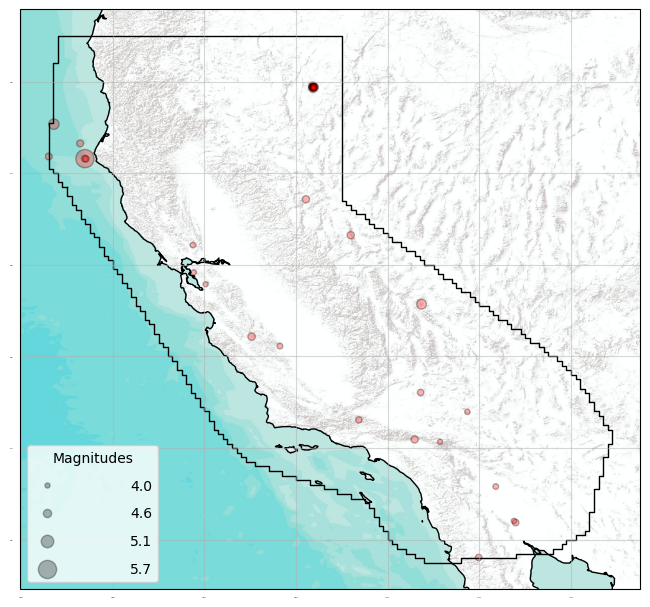

<GeoAxes: >

In [158]:
# set start and end date
start_time = csep.utils.time_utils.strptime_to_utc_datetime('2015-01-01 00:00:00.0')
end_time = csep.utils.time_utils.strptime_to_utc_datetime('2015-12-31 23:59:59.0')
# retrieve events in ComCat catalogue between start and end date
catalog = csep.query_comcat(start_time, end_time)

# set magnitude limits
min_mw = 3.95
max_mw = 8.95
# set magnitude bin length
dmw = 0.1

# Create space and magnitude regions. The forecast is already filtered in space and magnitude
magnitudes = csep.regions.magnitude_bins(min_mw, max_mw, dmw)
region = csep.regions.california_relm_region()

# Bind region information to the forecast
space_magnitude_region = csep.regions.create_space_magnitude_region(region, magnitudes)


# filter magnitude below 3.95
catalog.filter('magnitude >= 3.95')
# filter events outside spatial region
catalog.filter_spatial(space_magnitude_region)
# print summary information
print(catalog)

catalogEvents = catalog.to_dataframe()
catalog.plot(show=True)

### ETAS

In [159]:
## Load ETAS model
## start date: 01 Aug. 2007    end date: 30 Aug. 2018
## missing days: 0        min. magnitude: 3.95

# model path within the quatation marks **Depends on dowloading the forecast files and stored them in the data folder**
# file name is assumed to not have been renamed from download
etas_filename = '../data/ETAS_1day.hdf5'
# this will be a dictonary of pandas.DataFrames
ETAS = f_hdf5.load_hdf5_to_dict(etas_filename,
                                     start_date = '01/01/2015', # format dd/mm/yyyy
                                     end_date = '31/12/2015')

Loading year: 2015
Loading month: 1
Loading month: 10
Loading month: 11
Loading month: 12
Loading month: 2
Loading month: 3
Loading month: 4
Loading month: 5
Loading month: 6
Loading month: 7
Loading month: 8
Loading month: 9


#### Q-Score

In [160]:
#Initialize an empty list to store data
all_df = []
#Loop through the nested dictionary
for year, months in ETAS.items():
    for month, files in months.items():
        for file_, df in files.items():
            #Append the dataframe to the list
            all_df.append(df)
            
#combine all the dataframes in the files into a single dataframe
ETAS_forec = pd.concat(all_df, ignore_index = True)

#Optional to free memory space
del ETAS
del all_df

#Q Score Calculation with different percentage retention
print(QL.calculate_Q_score(fore_df= ETAS_forec,
                                cat_df = catalogEvents,
                                perc_retain = 0.05))

1.754938


#### L-Score

In [161]:
print(QL.ell_score(fore_df= ETAS_forec,
                        cat_df = catalogEvents))

#Optional to free memory space
del ETAS_forec

-246.74518


### ETASV1.1

In [189]:
## Load ETASV1.1 model
## start date: 01 July 2012    end date: 30 June 2018
## missing days: 4      min. magnitude: 3.95

# model path within the quatation marks **Depends on dowloading the forecast files and stored them in the data folder**
# file name is assumed to not have been renamed from download
ETASV1_1_filename = '../data/ETASV1_1_1day.hdf5'
# this will be a dictonary of pandas.DataFrames
ETASV1_1 = f_hdf5.load_hdf5_to_dict(ETASV1_1_filename,
                                     start_date = '01/01/2015', # format dd/mm/yyy
                                     end_date = '31/12/2015')

Loading year: 2015
Loading month: 1
Loading month: 10
Loading month: 11
Loading month: 12
Loading month: 2
Loading month: 3
Loading month: 4
Loading month: 5
Loading month: 6
Loading month: 7
Loading month: 8
Loading month: 9


#### Q-Score

In [190]:
all_df = []
#Loop through the nested dictionary
for year, months in ETASV1_1.items():
    for month, files in months.items():
        for file_, df in files.items():
            #Append the dataframe to the list
            all_df.append(df)
            
#combine all the dataframes in the files into a single dataframe
ETASV1_1_forec = pd.concat(all_df, ignore_index = True)

#Optional to free memory space
del all_df
del ETASV1_1

#Q Score Calculation with different percentage retention
print(QL.calculate_Q_score(fore_df= ETASV1_1_forec,
                                cat_df = catalogEvents,
                                perc_retain = 0.05))

0.87711674


#### L-Score

In [191]:
print(QL.ell_score(fore_df= ETASV1_1_forec,
                    cat_df = catalogEvents))
#Optional to free memory space
del ETASV1_1_forec

-154.1322


### ETAS_DROneDayMd2

In [174]:
## Load ETAS_DROneDayMd2 model
## start date: 01 Oct. 2012    end date: 30 June 2018
## missing days: 17       min. magnitude: 3.95

# model path within the quatation marks **Depends on dowloading the forecast files and stored them in the data folder**
# file name is assumed to not have been renamed from download
ETAS_DROneDayMd2_filename = '../data/ETAS_DROneDayMd2_1day.hdf5'
# this will be a dictonary of pandas.DataFrames
ETAS_DROneDayMd2 = f_hdf5.load_hdf5_to_dict(ETAS_DROneDayMd2_filename,
                                     start_date = '01/01/2015', # format dd/mm/yyy
                                     end_date = '31/12/2015')

Loading year: 2015
Loading month: 1
Loading month: 10
Loading month: 11
Loading month: 12
Loading month: 2
Loading month: 3
Loading month: 4
Loading month: 5
Loading month: 6
Loading month: 7
Loading month: 8
Loading month: 9


#### Q-Score

In [175]:
all_df = []
#Loop through the nested dictionary
for year, months in ETAS_DROneDayMd2.items():
    for month, files in months.items():
        for file_, df in files.items():
            #Append the dataframe to the list
            all_df.append(df)
            
#combine all the dataframes in the files into a single dataframe
ETAS_DROneDayMd2_forec = pd.concat(all_df, ignore_index = True)

#Optional to free memory space
del all_df
del ETAS_DROneDayMd2

#Q Score Calculation with different percentage retention
print(QL.calculate_Q_score(fore_df= ETAS_DROneDayMd2_forec,
                                cat_df = catalogEvents,
                                perc_retain = 0.05))

0.8297951


#### L-Score

In [176]:
print(QL.ell_score(fore_df= ETAS_DROneDayMd2_forec,
                    cat_df = catalogEvents))
#Optional to free memory space
del ETAS_DROneDayMd2_forec

-136.95143


### ETAS_DROneDayMd3

In [171]:
## Load ETAS_DROneDayMd3 model
## start date: 01 Oct. 2012    end date: 30 June 2018
## missing days: 5       min. magnitude: 3.95

# model path within the quatation marks **Depends on dowloading the forecast files and stored them in the data folder**
# file name is assumed to not have been renamed from download
ETAS_DROneDayMd3_filename = '../data/ETAS_DROneDayMd3_1day.hdf5'
# this will be a dictonary of pandas.DataFrames
ETAS_DROneDayMd3 = f_hdf5.load_hdf5_to_dict(ETAS_DROneDayMd3_filename,
                                     start_date = '01/01/2015', # format dd/mm/yyy
                                     end_date = '31/12/2015')

Loading year: 2015
Loading month: 1
Loading month: 10
Loading month: 11
Loading month: 12
Loading month: 2
Loading month: 3
Loading month: 4
Loading month: 5
Loading month: 6
Loading month: 7
Loading month: 8
Loading month: 9


#### Q-Score

In [172]:
all_df = []
#Loop through the nested dictionary
for year, months in ETAS_DROneDayMd3.items():
    for month, files in months.items():
        for file_, df in files.items():
            #Append the dataframe to the list
            all_df.append(df)
            
#combine all the dataframes in the files into a single dataframe
ETAS_DROneDayMd3_forec = pd.concat(all_df, ignore_index = True)

#Optional to free memory space
del all_df
del ETAS_DROneDayMd3

#Q Score Calculation with different percentage retention
print(QL.calculate_Q_score(fore_df= ETAS_DROneDayMd3_forec,
                                cat_df = catalogEvents,
                                perc_retain = 0.05))

0.67174524


#### L-Score

In [173]:
print(QL.ell_score(fore_df= ETAS_DROneDayMd3_forec,
                    cat_df = catalogEvents))
#Optional to free memory space
del ETAS_DROneDayMd3_forec

-137.0457


### ETAS_HWMd2

In [201]:
## Load ETAS_HWMd2 model
## start date: 01 Oct. 2012    end date: 19 Sep. 2016
## missing days: 0     min. magnitude: 3.95

# model path within the quatation marks **Depends on dowloading the forecast files and stored them in the data folder**
# file name is assumed to not have been renamed from download
ETAS_HWMd2_filename = '../data/ETAS_HWMd2_1day.hdf5'
# this will be a dictonary of pandas.DataFrames
ETAS_HWMd2 = f_hdf5.load_hdf5_to_dict(ETAS_HWMd2_filename,
                                     start_date = '01/01/2015', # format dd/mm/yyy
                                     end_date = '31/12/2015')

Loading year: 2015
Loading month: 1
Loading month: 10
Loading month: 11
Loading month: 12
Loading month: 2
Loading month: 3
Loading month: 4
Loading month: 5
Loading month: 6
Loading month: 7
Loading month: 8
Loading month: 9


#### Q-Score

In [202]:
all_df = []
#Loop through the nested dictionary
for year, months in ETAS_HWMd2.items():
    for month, files in months.items():
        for file_, df in files.items():
            #Append the dataframe to the list
            all_df.append(df)
            
#combine all the dataframes in the files into a single dataframe
ETAS_HWMd2_forec = pd.concat(all_df, ignore_index = True)

#Optional to free memory space
del all_df
del ETAS_HWMd2

print(QL.calculate_Q_score(fore_df= ETAS_HWMd2_forec,
                                cat_df = catalogEvents,
                                perc_retain = 0.05))

0.20040658


#### L-Score

In [203]:
print(QL.ell_score(fore_df= ETAS_HWMd2_forec,
                    cat_df = catalogEvents))
#Optional to free memory space
del ETAS_HWMd2_forec

-139.4583


### ETAS_HWMd3

In [186]:
## Load ETAS_HWMd3 model
## start date: 01 Oct. 2012    end date: 30 June 2018
## missing days: 5      min. magnitude: 3.95

# model path within the quatation marks **Depends on dowloading the forecast files and stored them in the data folder**
# file name is assumed to not have been renamed from download
ETAS_HWMd3_filename = '../data/ETAS_HWMd3_1day.hdf5'
# this will be a dictonary of pandas.DataFrames
ETAS_HWMd3 = f_hdf5.load_hdf5_to_dict(ETAS_HWMd3_filename,
                                     start_date = '01/01/2015', # format dd/mm/yyy
                                     end_date = '31/12/2015')

Loading year: 2015
Loading month: 1
Loading month: 10
Loading month: 11
Loading month: 12
Loading month: 2
Loading month: 3
Loading month: 4
Loading month: 5
Loading month: 6
Loading month: 7
Loading month: 8
Loading month: 9


#### Q-Score

In [187]:
all_df = []
#Loop through the nested dictionary
for year, months in ETAS_HWMd3.items():
    for month, files in months.items():
        for file_, df in files.items():
            #Append the dataframe to the list
            all_df.append(df)
            
#combine all the dataframes in the files into a single dataframe
ETAS_HWMd3_forec = pd.concat(all_df, ignore_index = True)

#Optional to free memory space
del all_df
del ETAS_HWMd3

#Q Score Calculation with different percentage retention
print(QL.calculate_Q_score(fore_df= ETAS_HWMd3_forec,
                                cat_df = catalogEvents,
                                perc_retain = 0.05))

0.37064815


#### L-Score

In [188]:
print(QL.ell_score(fore_df= ETAS_HWMd3_forec,
                     cat_df = catalogEvents))
#Optional to free memory space
del ETAS_HWMd3_forec

-134.88109


### STEPJAVA

In [165]:
## Load STEPJAVA model
## start date: 01 Sep. 2010    end date: 30 June 2018
## missing days: 0        min. magnitude: 3.95

# model path within the quatation marks **Depends on dowloading the forecast files and stored them in the data folder**
# file name is assumed to not have been renamed from download
STEPJAVA_filename = '../data/STEPJAVA_1day.hdf5'
# this will be a dictonary of pandas.DataFrames
STEPJAVA = f_hdf5.load_hdf5_to_dict(STEPJAVA_filename,
                                     start_date = '01/01/2015', # format dd/mm/yyy
                                     end_date = '31/12/2015')

Loading year: 2015
Loading month: 1
Loading month: 10
Loading month: 11
Loading month: 12
Loading month: 2
Loading month: 3
Loading month: 4
Loading month: 5
Loading month: 6
Loading month: 7
Loading month: 8
Loading month: 9


#### Q-Score

In [166]:
#Initialize an empty list to store data
all_df = []
#Loop through the nested dictionary
for year, months in STEPJAVA.items():
    for month, files in months.items():
        for file_, df in files.items():
            #Append the dataframe to the list
            all_df.append(df)
            
#combine all the dataframes in the files into a single dataframe
STEPJAVA_forec = pd.concat(all_df, ignore_index = True)

#Optional to free memory space
del all_df
del STEPJAVA

#Q Score Calculation with different percentage retention
print(QL.calculate_Q_score(fore_df= STEPJAVA_forec,
                                cat_df = catalogEvents,
                                perc_retain = 0.05))

0.0


#### L-Score

In [167]:
print(QL.ell_score(fore_df= STEPJAVA_forec,
                 cat_df = catalogEvents))

# add waterlevelto zero valued bins
print(QL.ell_score(fore_df= STEPJAVA_forec,
                 cat_df = catalogEvents,
                 waterlevel = 1e-6))

#Optional to free memory space
del STEPJAVA_forec

C:\Users\arjon\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


-inf


C:\Users\arjon\OneDrive\Documents\S Score\Project\src\QandL.py:39: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1e-06' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  df_out.iloc[target_idx,6] = waterlevel


-212.33032553415916


### KJSSOneDay

In [162]:
## Load KJSSOneDay model
## start date: 01 Jan. 2009    end date: 30 June 2018
## missing days: 0        min. magnitude: 3.95

# model path within the quatation marks **Depends on dowloading the forecast files and stored them in the data folder**
# file name is assumed to not have been renamed from download
KJSSOne_filename = '../data/KJSSOneDayCalifornia_1day.hdf5'
# this will be a dictonary of pandas.DataFrames
KJSSOne = f_hdf5.load_hdf5_to_dict(KJSSOne_filename,
                                     start_date = '01/01/2015', # format dd/mm/yyy
                                     end_date = '31/12/2015')

Loading year: 2015
Loading month: 1
Loading month: 10
Loading month: 11
Loading month: 12
Loading month: 2
Loading month: 3
Loading month: 4
Loading month: 5
Loading month: 6
Loading month: 7
Loading month: 8
Loading month: 9


#### Q-Score

In [163]:
#Initialize an empty list to store data
all_df = []
#Loop through the nested dictionary
for year, months in KJSSOne.items():
    for month, files in months.items():
        for file_, df in files.items():
            #Append the dataframe to the list
            all_df.append(df)
            
#combine all the dataframes in the files into a single dataframe
KJSSOne_forec = pd.concat(all_df, ignore_index = True)

#Optional to free memory space
del KJSSOne
del all_df

#Q Score Calculation with different percentage retention
print(QL.calculate_Q_score(fore_df= KJSSOne_forec,
                                cat_df = catalogEvents,
                                perc_retain = 0.05))

0.5082199


#### L-Score

In [164]:
print(QL.ell_score(fore_df= KJSSOne_forec,
                        cat_df = catalogEvents))

#Optional to free memory space
del KJSSOne_forec

-181.4761


### K3Md2

In [204]:
## Load K3Md2 Model model
## start date: 01 Oct. 2012    end date: 19 Sep. 2016
## missing days: 0     min. magnitude: 3.95

# model path within the quatation marks **Depends on dowloading the forecast files and stored them in the data folder**
# file name is assumed to not have been renamed from download
K3Md2_filename = '../data/K3Md2_1day.hdf5'
# this will be a dictonary of pandas.DataFrames
K3Md2 = f_hdf5.load_hdf5_to_dict(K3Md2_filename,
                                     start_date = '01/01/2015', # format dd/mm/yyy
                                     end_date = '31/12/2015') 

Loading year: 2015
Loading month: 1
Loading month: 10
Loading month: 11
Loading month: 12
Loading month: 2
Loading month: 3
Loading month: 4
Loading month: 5
Loading month: 6
Loading month: 7
Loading month: 8
Loading month: 9


#### Q-Score

In [205]:
all_df = []
#Loop through the nested dictionary
for year, months in K3Md2.items():
    for month, files in months.items():
        for file_, df in files.items():
            #Append the dataframe to the list
            all_df.append(df)
            
#combine all the dataframes in the files into a single dataframe
K3Md2_forec = pd.concat(all_df, ignore_index = True)

#Optional to free memory space
del all_df
del K3Md2

print(QL.calculate_Q_score(fore_df= K3Md2_forec,
                                cat_df = catalogEvents,
                                perc_retain = 0.05))

0.08069553


#### L-Score

In [206]:
print(QL.ell_score(fore_df= K3Md2_forec,
                    cat_df = catalogEvents))
#Optional to free memory space
del K3Md2_forec

-159.33887


### K3Md3

In [168]:
## Load K3Md3 model
## start date: 01 Oct. 2012    end date: 30 June 2018
## missing days: 5       min. magnitude: 3.95

# model path within the quatation marks **Depends on dowloading the forecast files and stored them in the data folder**
# file name is assumed to not have been renamed from download
K3Md3_filename = '../data/K3Md3_1day.hdf5'
# this will be a dictonary of pandas.DataFrames
K3Md3 = f_hdf5.load_hdf5_to_dict(K3Md3_filename,
                                     start_date = '01/01/2015', # format dd/mm/yyy
                                     end_date = '31/12/2015')

Loading year: 2015
Loading month: 1
Loading month: 10
Loading month: 11
Loading month: 12
Loading month: 2
Loading month: 3
Loading month: 4
Loading month: 5
Loading month: 6
Loading month: 7
Loading month: 8
Loading month: 9


#### Q-Score

In [169]:
all_df = []
#Loop through the nested dictionary
for year, months in K3Md3.items():
    for month, files in months.items():
        for file_, df in files.items():
            #Append the dataframe to the list
            all_df.append(df)
            
#combine all the dataframes in the files into a single dataframe
K3Md3_forec = pd.concat(all_df, ignore_index = True)

#Optional to free memory space
del all_df
del K3Md3

#Q Score Calculation with different percentage retention
print(QL.calculate_Q_score(fore_df= K3Md3_forec,
                                cat_df = catalogEvents,
                                perc_retain = 0.05))

0.054896966


#### L-Score

In [170]:
print(QL.ell_score(fore_df= K3Md3_forec,
                    cat_df = catalogEvents))
#Optional to free memory space
del K3Md3_forec

-161.37215


### ETAS_DROneDayPPEMd2

In [180]:
## Load ETAS_DROneDayPPEMd2 model
## start date: 01 Oct. 2012    end date: 30 June 2018
## missing days: 18      min. magnitude: 3.95

# model path within the quatation marks **Depends on dowloading the forecast files and stored them in the data folder**
# file name is assumed to not have been renamed from download
ETAS_DROneDayPPEMd2_filename = '../data/ETAS_DROneDayPPEMd2_1day.hdf5'
# this will be a dictonary of pandas.DataFrames
ETAS_DROneDayPPEMd2 = f_hdf5.load_hdf5_to_dict(ETAS_DROneDayPPEMd2_filename,
                                     start_date = '01/01/2015', # format dd/mm/yyy
                                     end_date = '31/12/2015')

Loading year: 2015
Loading month: 1
Loading month: 10
Loading month: 11
Loading month: 12
Loading month: 2
Loading month: 3
Loading month: 4
Loading month: 5
Loading month: 6
Loading month: 7
Loading month: 8
Loading month: 9


#### Q-Score

In [181]:
all_df = []
#Loop through the nested dictionary
for year, months in ETAS_DROneDayPPEMd2.items():
    for month, files in months.items():
        for file_, df in files.items():
            #Append the dataframe to the list
            all_df.append(df)
            
#combine all the dataframes in the files into a single dataframe
ETAS_DROneDayPPEMd2_forec = pd.concat(all_df, ignore_index = True)

#Optional to free memory space
del all_df
del ETAS_DROneDayPPEMd2

#Q Score Calculation with different percentage retention
print(QL.calculate_Q_score(fore_df= ETAS_DROneDayPPEMd2_forec,
                                cat_df = catalogEvents,
                                perc_retain = 0.05))

1.8456281


#### L-Score

In [182]:
print(QL.ell_score(fore_df= ETAS_DROneDayPPEMd2_forec,
                    cat_df = catalogEvents))
#Optional to free memory space
del ETAS_DROneDayPPEMd2_forec

-253.15714


### ETAS_DROneDayPPEMd3

In [177]:
## Load ETAS_DROneDayPPEMd3 model
## start date: 01 Oct. 2012    end date: 30 June 2018
## missing days: 6      min. magnitude: 3.95

# model path within the quatation marks **Depends on dowloading the forecast files and stored them in the data folder**
# file name is assumed to not have been renamed from download
ETAS_DROneDayPPEMd3_filename = '../data/ETAS_DROneDayPPEMd3_1day.hdf5'
# this will be a dictonary of pandas.DataFrames
ETAS_DROneDayPPEMd3 = f_hdf5.load_hdf5_to_dict(ETAS_DROneDayPPEMd3_filename,
                                     start_date = '01/01/2015', # format dd/mm/yyy
                                     end_date = '31/12/2015')

Loading year: 2015
Loading month: 1
Loading month: 10
Loading month: 11
Loading month: 12
Loading month: 2
Loading month: 3
Loading month: 4
Loading month: 5
Loading month: 6
Loading month: 7
Loading month: 8
Loading month: 9


#### Q-Score

In [178]:
all_df = []
#Loop through the nested dictionary
for year, months in ETAS_DROneDayPPEMd3.items():
    for month, files in months.items():
        for file_, df in files.items():
            #Append the dataframe to the list
            all_df.append(df)
            
#combine all the dataframes in the files into a single dataframe
ETAS_DROneDayPPEMd3_forec = pd.concat(all_df, ignore_index = True)

#Optional to free memory space
del all_df
del ETAS_DROneDayPPEMd3

#Q Score Calculation with different percentage retention
print(QL.calculate_Q_score(fore_df= ETAS_DROneDayPPEMd3_forec,
                                cat_df = catalogEvents,
                                perc_retain = 0.05))

1.7088698


#### L-Score

In [179]:
print(QL.ell_score(fore_df= ETAS_DROneDayPPEMd3_forec,
                    cat_df = catalogEvents))
#Optional to free memory space
del ETAS_DROneDayPPEMd3_forec

-232.92433


### ETAS_HW_K3_AVERAGE_Md2

In [198]:
## Load ETAS_HW_K3_AVERAGE_Md2 model
## start date: 01 Oct. 2012    end date: 19 Sep. 2016
## missing days: 1     min. magnitude: 3.95

# model path within the quatation marks **Depends on dowloading the forecast files and stored them in the data folder**
# file name is assumed to not have been renamed from download
ETAS_HW_K3_AVERAGE_Md2_filename = '../data/ETAS_HW_K3_AVERAGE_Md2_1day.hdf5'
# this will be a dictonary of pandas.DataFrames
ETAS_HW_K3_AVERAGE_Md2 = f_hdf5.load_hdf5_to_dict(ETAS_HW_K3_AVERAGE_Md2_filename,
                                     start_date = '01/01/2015', # format dd/mm/yyy
                                     end_date = '31/12/2015') 

Loading year: 2015
Loading month: 1
Loading month: 10
Loading month: 11
Loading month: 12
Loading month: 2
Loading month: 3
Loading month: 4
Loading month: 5
Loading month: 6
Loading month: 7
Loading month: 8
Loading month: 9


#### Q-Score

In [199]:
all_df = []
#Loop through the nested dictionary
for year, months in ETAS_HW_K3_AVERAGE_Md2.items():
    for month, files in months.items():
        for file_, df in files.items():
            #Append the dataframe to the list
            all_df.append(df)
            
#combine all the dataframes in the files into a single dataframe
ETAS_HW_K3_AVERAGE_Md2_forec = pd.concat(all_df, ignore_index = True)

#Optional to free memory space
del all_df
del ETAS_HW_K3_AVERAGE_Md2

print(QL.calculate_Q_score(fore_df= ETAS_HW_K3_AVERAGE_Md2_forec,
                                cat_df = catalogEvents,
                                perc_retain = 0.05))

0.13933264


#### L-Score

In [200]:
print(QL.ell_score(fore_df= ETAS_HW_K3_AVERAGE_Md2_forec,
                  cat_df = catalogEvents))
#Optional to free memory space
del ETAS_HW_K3_AVERAGE_Md2_forec

-146.63353


### ETAS_HW_K3_AVERAGE_Md3

In [183]:
## Load ETAS_HW_K3_AVERAGE_Md3 model
## start date: 01 Oct. 2012    end date: 30 June 2018
## missing days: 23      min. magnitude: 3.95

# model path within the quatation marks **Depends on dowloading the forecast files and stored them in the data folder**
# file name is assumed to not have been renamed from download
ETAS_HW_K3_AVERAGE_Md3_filename = '../data/ETAS_HW_K3_AVERAGE_Md3_1day.hdf5'
# this will be a dictonary of pandas.DataFrames
ETAS_HW_K3_AVERAGE_Md3 = f_hdf5.load_hdf5_to_dict(ETAS_HW_K3_AVERAGE_Md3_filename,
                                     start_date = '01/01/2015', # format dd/mm/yyy
                                     end_date = '31/12/2015')

Loading year: 2015
Loading month: 1
Loading month: 10
Loading month: 11
Loading month: 12
Loading month: 2
Loading month: 3
Loading month: 4
Loading month: 5
Loading month: 6
Loading month: 7
Loading month: 8
Loading month: 9


#### Q-Score

In [184]:
all_df = []
#Loop through the nested dictionary
for year, months in ETAS_HW_K3_AVERAGE_Md3.items():
    for month, files in months.items():
        for file_, df in files.items():
            #Append the dataframe to the list
            all_df.append(df)
            
#combine all the dataframes in the files into a single dataframe
ETAS_HW_K3_AVERAGE_Md3_forec = pd.concat(all_df, ignore_index = True)

#Optional to free memory space
del all_df
del ETAS_HW_K3_AVERAGE_Md3

#Q Score Calculation with different percentage retention
print(QL.calculate_Q_score(fore_df= ETAS_HW_K3_AVERAGE_Md3_forec,
                                cat_df = catalogEvents,
                                perc_retain = 0.05))

0.20275785


#### L-Score

In [185]:
print(QL.ell_score(fore_df= ETAS_HW_K3_AVERAGE_Md3_forec,
                    cat_df = catalogEvents))
#Optional to free memory space
del ETAS_HW_K3_AVERAGE_Md3_forec

-143.15112


### OneDayBayesianBMA

In [192]:
## Load OneDayBayesianBMA model
## start date: 01 July 2012    end date: 07 Aug. 2016
## missing days: 0     min. magnitude: 3.95

# model path within the quatation marks **Depends on dowloading the forecast files and stored them in the data folder**
# file name is assumed to not have been renamed from download
OneDayBayesianBMA_filename = '../data/OneDayBayesianBMA_1day.hdf5'
# this will be a dictonary of pandas.DataFrames
OneDayBayesianBMA = f_hdf5.load_hdf5_to_dict(OneDayBayesianBMA_filename,
                                     start_date = '01/01/2015', # format dd/mm/yyy
                                     end_date = '31/12/2015')

Loading year: 2015
Loading month: 1
Loading month: 10
Loading month: 11
Loading month: 12
Loading month: 2
Loading month: 3
Loading month: 4
Loading month: 5
Loading month: 6
Loading month: 7
Loading month: 8
Loading month: 9


#### Q-Score

In [193]:
all_df = []
#Loop through the nested dictionary
for year, months in OneDayBayesianBMA.items():
    for month, files in months.items():
        for file_, df in files.items():
            #Append the dataframe to the list
            all_df.append(df)
            
#combine all the dataframes in the files into a single dataframe
OneDayBayesianBMA_forec = pd.concat(all_df, ignore_index = True)

#Optional to free memory space
del all_df
del OneDayBayesianBMA

print(QL.calculate_Q_score(fore_df= OneDayBayesianBMA_forec,
                                cat_df = catalogEvents,
                                perc_retain = 0.05))

0.87711674


#### L-Score

In [194]:
print(QL.ell_score(fore_df= OneDayBayesianBMA_forec,
                    cat_df = catalogEvents))
#Optional to free memory space
del OneDayBayesianBMA_forec

-154.1322


### OneDayBayesianSeqBMA

In [195]:
## Load OneDayBayesianSeqBMA model
## start date: 01 July 2012    end date: 07 Aug. 2016
## missing days: 0     min. magnitude: 3.95

# model path within the quatation marks **Depends on dowloading the forecast files and stored them in the data folder**
# file name is assumed to not have been renamed from download
OneDayBayesianSeqBMA_filename = '../data/OneDayBayesianSeqBMA_1day.hdf5'
# this will be a dictonary of pandas.DataFrames
OneDayBayesianSeqBMA = f_hdf5.load_hdf5_to_dict(OneDayBayesianSeqBMA_filename,
                                     start_date = '01/01/2015', # format dd/mm/yyy
                                     end_date = '31/12/2015')

Loading year: 2015
Loading month: 1
Loading month: 10
Loading month: 11
Loading month: 12
Loading month: 2
Loading month: 3
Loading month: 4
Loading month: 5
Loading month: 6
Loading month: 7
Loading month: 8
Loading month: 9


#### Q-Score

In [196]:
all_df = []
#Loop through the nested dictionary
for year, months in OneDayBayesianSeqBMA.items():
    for month, files in months.items():
        for file_, df in files.items():
            #Append the dataframe to the list
            all_df.append(df)
            
#combine all the dataframes in the files into a single dataframe
OneDayBayesianSeqBMA_forec = pd.concat(all_df, ignore_index = True)

#Optional to free memory space
del all_df
del OneDayBayesianSeqBMA

print(QL.calculate_Q_score(fore_df= OneDayBayesianSeqBMA_forec,
                                cat_df = catalogEvents,
                                perc_retain = 0.05))

0.87711674


#### L-Score

In [197]:
print(QL.ell_score(fore_df= OneDayBayesianSeqBMA_forec,
                    cat_df = catalogEvents))
#Optional to free memory space
del OneDayBayesianSeqBMA_forec

-154.1322


## 2016

Fetched ComCat catalog in 3.714601516723633 seconds.

Downloaded catalog from ComCat with following parameters
Start Date: 2016-01-01 13:40:30.650000+00:00
End Date: 2016-12-31 23:48:13.270000+00:00
Min Latitude: 31.5016667 and Max Latitude: 42.444
Min Longitude: -125.3781667 and Max Longitude: -113.1156
Min Magnitude: 2.5
Found 1100 events in the ComCat catalog.

        Name: None

        Start Date: 2016-01-02 05:11:46.620000+00:00
        End Date: 2016-12-28 09:13:47.243000+00:00

        Latitude: (32.9583333, 41.8685)
        Longitude: (-125.3781667, -115.701)

        Min Mw: 3.95
        Max Mw: 5.6

        Event Count: 36
        


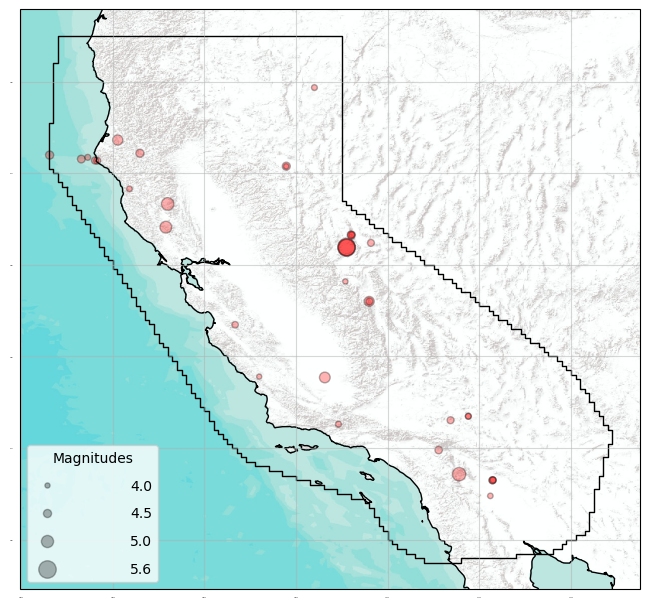

<GeoAxes: >

In [207]:
# set start and end date
start_time = csep.utils.time_utils.strptime_to_utc_datetime('2016-01-01 00:00:00.0')
end_time = csep.utils.time_utils.strptime_to_utc_datetime('2016-12-31 23:59:59.0')
# retrieve events in ComCat catalogue between start and end date
catalog = csep.query_comcat(start_time, end_time)

# set magnitude limits
min_mw = 3.95
max_mw = 8.95
# set magnitude bin length
dmw = 0.1

# Create space and magnitude regions. The forecast is already filtered in space and magnitude
magnitudes = csep.regions.magnitude_bins(min_mw, max_mw, dmw)
region = csep.regions.california_relm_region()

# Bind region information to the forecast
space_magnitude_region = csep.regions.create_space_magnitude_region(region, magnitudes)


# filter magnitude below 3.95
catalog.filter('magnitude >= 3.95')
# filter events outside spatial region
catalog.filter_spatial(space_magnitude_region)
# print summary information
print(catalog)

catalogEvents = catalog.to_dataframe()
catalog.plot(show=True)

### ETAS

In [208]:
## Load ETAS model
## start date: 01 Aug. 2007    end date: 30 Aug. 2018
## missing days: 0        min. magnitude: 3.95
#
# model path within the quatation marks **Depends on dowloading the forecast files and stored them in the data folder**
# file name is assumed to not have been renamed from download
etas_filename = '../data/ETAS_1day.hdf5'
# this will be a dictonary of pandas.DataFrames
ETAS = f_hdf5.load_hdf5_to_dict(etas_filename,
                                     start_date = '01/01/2016', # format dd/mm/yyyy
                                     end_date = '31/12/2016')

Loading year: 2016
Loading month: 1
Loading month: 10
Loading month: 11
Loading month: 12
Loading month: 2
Loading month: 3
Loading month: 4
Loading month: 5
Loading month: 6
Loading month: 7
Loading month: 8
Loading month: 9


#### Q-Score

In [209]:
#Initialize an empty list to store data
all_df = []
#Loop through the nested dictionary
for year, months in ETAS.items():
    for month, files in months.items():
        for file_, df in files.items():
            #Append the dataframe to the list
            all_df.append(df)
            
#combine all the dataframes in the files into a single dataframe
ETAS_forec = pd.concat(all_df, ignore_index = True)

#Optional to free memory space
del ETAS
del all_df

#Q Score Calculation with different percentage retention
print(QL.calculate_Q_score(fore_df= ETAS_forec,
                                cat_df = catalogEvents,
                                perc_retain = 0.05))

1.4113102


#### L-Score

In [210]:
print(QL.ell_score(fore_df= ETAS_forec,
                        cat_df = catalogEvents))

#Optional to free memory space
del ETAS_forec

-246.06372


### ETASV1.1

In [238]:
## Load ETASV1.1 model
## start date: 01 July 2012    end date: 30 June 2018
## missing days: 4      min. magnitude: 3.95

# model path within the quatation marks **Depends on dowloading the forecast files and stored them in the data folder**
# file name is assumed to not have been renamed from download
ETASV1_1_filename = '../data/ETASV1_1_1day.hdf5'
# this will be a dictonary of pandas.DataFrames
ETASV1_1 = f_hdf5.load_hdf5_to_dict(ETASV1_1_filename,
                                     start_date = '01/01/2016', # format dd/mm/yyy
                                     end_date = '31/12/2016')

Loading year: 2016
Loading month: 1
Loading month: 10
Loading month: 11
Loading month: 12
Loading month: 2
Loading month: 3
Loading month: 4
Loading month: 5
Loading month: 6
Loading month: 7
Loading month: 8
Loading month: 9


#### Q-Score

In [239]:
all_df = []
#Loop through the nested dictionary
for year, months in ETASV1_1.items():
    for month, files in months.items():
        for file_, df in files.items():
            #Append the dataframe to the list
            all_df.append(df)
            
#combine all the dataframes in the files into a single dataframe
ETASV1_1_forec = pd.concat(all_df, ignore_index = True)

#Optional to free memory space
del all_df
del ETASV1_1

#Q Score Calculation with different percentage retention
print(QL.calculate_Q_score(fore_df= ETASV1_1_forec,
                                cat_df = catalogEvents,
                                perc_retain = 0.05))

1.740312


#### L-Score

In [240]:
print(QL.ell_score(fore_df= ETASV1_1_forec,
                    cat_df = catalogEvents))
#Optional to free memory space
del ETASV1_1_forec

-167.68134


### ETAS_DROneDayMd2

In [223]:
## Load ETAS_DROneDayMd2 model
## start date: 01 Oct. 2012    end date: 30 June 2018
## missing days: 17       min. magnitude: 3.95

# model path within the quatation marks **Depends on dowloading the forecast files and stored them in the data folder**
# file name is assumed to not have been renamed from download
ETAS_DROneDayMd2_filename = '../data/ETAS_DROneDayMd2_1day.hdf5'
# this will be a dictonary of pandas.DataFrames
ETAS_DROneDayMd2 = f_hdf5.load_hdf5_to_dict(ETAS_DROneDayMd2_filename,
                                     start_date = '01/01/2016', # format dd/mm/yyy
                                     end_date = '31/12/2016')

Loading year: 2016
Loading month: 1
Loading month: 10
Loading month: 11
Loading month: 12
Loading month: 2
Loading month: 3
Loading month: 4
Loading month: 5
Loading month: 6
Loading month: 7
Loading month: 8
Loading month: 9


#### Q-Score

In [224]:
all_df = []
#Loop through the nested dictionary
for year, months in ETAS_DROneDayMd2.items():
    for month, files in months.items():
        for file_, df in files.items():
            #Append the dataframe to the list
            all_df.append(df)
            
#combine all the dataframes in the files into a single dataframe
ETAS_DROneDayMd2_forec = pd.concat(all_df, ignore_index = True)

#Optional to free memory space
del all_df
del ETAS_DROneDayMd2

#Q Score Calculation with different percentage retention
print(QL.calculate_Q_score(fore_df= ETAS_DROneDayMd2_forec,
                                cat_df = catalogEvents,
                                perc_retain = 0.05))

3.1549268


#### L-Score

In [225]:
print(QL.ell_score(fore_df= ETAS_DROneDayMd2_forec,
                    cat_df = catalogEvents))
#Optional to free memory space
del ETAS_DROneDayMd2_forec

-158.01955


### ETAS_DROneDayMd3

In [220]:
## Load ETAS_DROneDayMd3 model
## start date: 01 Oct. 2012    end date: 30 June 2018
## missing days: 5       min. magnitude: 3.95

# model path within the quatation marks **Depends on dowloading the forecast files and stored them in the data folder**
# file name is assumed to not have been renamed from download
ETAS_DROneDayMd3_filename = '../data/ETAS_DROneDayMd3_1day.hdf5'
# this will be a dictonary of pandas.DataFrames
ETAS_DROneDayMd3 = f_hdf5.load_hdf5_to_dict(ETAS_DROneDayMd3_filename,
                                     start_date = '01/01/2016', # format dd/mm/yyy
                                     end_date = '31/12/2016')

Loading year: 2016
Loading month: 1
Loading month: 10
Loading month: 11
Loading month: 12
Loading month: 2
Loading month: 3
Loading month: 4
Loading month: 5
Loading month: 6
Loading month: 7
Loading month: 8
Loading month: 9


#### Q-Score

In [221]:
all_df = []
#Loop through the nested dictionary
for year, months in ETAS_DROneDayMd3.items():
    for month, files in months.items():
        for file_, df in files.items():
            #Append the dataframe to the list
            all_df.append(df)
            
#combine all the dataframes in the files into a single dataframe
ETAS_DROneDayMd3_forec = pd.concat(all_df, ignore_index = True)

#Optional to free memory space
del all_df
del ETAS_DROneDayMd3

#Q Score Calculation with different percentage retention
print(QL.calculate_Q_score(fore_df= ETAS_DROneDayMd3_forec,
                                cat_df = catalogEvents,
                                perc_retain = 0.05))

1.7373854


#### L-Score

In [222]:
print(QL.ell_score(fore_df= ETAS_DROneDayMd3_forec,
                    cat_df = catalogEvents))
#Optional to free memory space
del ETAS_DROneDayMd3_forec

-158.25244


### ETAS_HWMd3

In [235]:
## Load ETAS_HWMd3 model
## start date: 01 Oct. 2012    end date: 30 June 2018
## missing days: 5      min. magnitude: 3.95

# model path within the quatation marks **Depends on dowloading the forecast files and stored them in the data folder**
# file name is assumed to not have been renamed from download
ETAS_HWMd3_filename = '../data/ETAS_HWMd3_1day.hdf5'
# this will be a dictonary of pandas.DataFrames
ETAS_HWMd3 = f_hdf5.load_hdf5_to_dict(ETAS_HWMd3_filename,
                                     start_date = '01/01/2016', # format dd/mm/yyy
                                     end_date = '31/12/2016')

Loading year: 2016
Loading month: 1
Loading month: 10
Loading month: 11
Loading month: 12
Loading month: 2
Loading month: 3
Loading month: 4
Loading month: 5
Loading month: 6
Loading month: 7
Loading month: 8
Loading month: 9


#### Q-Score

In [236]:
all_df = []
#Loop through the nested dictionary
for year, months in ETAS_HWMd3.items():
    for month, files in months.items():
        for file_, df in files.items():
            #Append the dataframe to the list
            all_df.append(df)
            
#combine all the dataframes in the files into a single dataframe
ETAS_HWMd3_forec = pd.concat(all_df, ignore_index = True)

#Optional to free memory space
del all_df
del ETAS_HWMd3

#Q Score Calculation with different percentage retention
print(QL.calculate_Q_score(fore_df= ETAS_HWMd3_forec,
                                cat_df = catalogEvents,
                                perc_retain = 0.05))

1.9143507


#### L-Score

In [237]:
print(QL.ell_score(fore_df= ETAS_HWMd3_forec,
                     cat_df = catalogEvents))
#Optional to free memory space
del ETAS_HWMd3_forec

-159.54663


### STEPJAVA

In [214]:
## Load STEPJAVA model
## start date: 01 Sep. 2010    end date: 30 June 2018
## missing days: 0        min. magnitude: 3.95

# model path within the quatation marks **Depends on dowloading the forecast files and stored them in the data folder**
# file name is assumed to not have been renamed from download
STEPJAVA_filename = '../data/STEPJAVA_1day.hdf5'
# this will be a dictonary of pandas.DataFrames
STEPJAVA = f_hdf5.load_hdf5_to_dict(STEPJAVA_filename,
                                     start_date = '01/01/2016', # format dd/mm/yyy
                                     end_date = '31/12/2016')

Loading year: 2016
Loading month: 1
Loading month: 10
Loading month: 11
Loading month: 12
Loading month: 2
Loading month: 3
Loading month: 4
Loading month: 5
Loading month: 6
Loading month: 7
Loading month: 8
Loading month: 9


#### Q-Score

In [215]:
#Initialize an empty list to store data
all_df = []
#Loop through the nested dictionary
for year, months in STEPJAVA.items():
    for month, files in months.items():
        for file_, df in files.items():
            #Append the dataframe to the list
            all_df.append(df)
            
#combine all the dataframes in the files into a single dataframe
STEPJAVA_forec = pd.concat(all_df, ignore_index = True)

#Optional to free memory space
del all_df
del STEPJAVA

#Q Score Calculation with different percentage retention
print(QL.calculate_Q_score(fore_df= STEPJAVA_forec,
                                cat_df = catalogEvents,
                                perc_retain = 0.05))

1.9024143


#### L-Score

In [216]:
print(QL.ell_score(fore_df= STEPJAVA_forec,
                 cat_df = catalogEvents))

# add waterlevelto zero valued bins
print(QL.ell_score(fore_df= STEPJAVA_forec,
                 cat_df = catalogEvents,
                 waterlevel = 1e-6))

#Optional to free memory space
del STEPJAVA_forec

C:\Users\arjon\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


-inf


C:\Users\arjon\OneDrive\Documents\S Score\Project\src\QandL.py:39: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1e-06' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  df_out.iloc[target_idx,6] = waterlevel


-184.96761668093234


### KJSSOneDay

In [211]:
## Load KJSSOneDay model
## start date: 01 Jan. 2009    end date: 30 June 2018
## missing days: 0        min. magnitude: 3.95

# model path within the quatation marks **Depends on dowloading the forecast files and stored them in the data folder**
# file name is assumed to not have been renamed from download
KJSSOne_filename = '../data/KJSSOneDayCalifornia_1day.hdf5'
# this will be a dictonary of pandas.DataFrames
KJSSOne = f_hdf5.load_hdf5_to_dict(KJSSOne_filename,
                                     start_date = '01/01/2016', # format dd/mm/yyy
                                     end_date = '31/12/2016')

Loading year: 2016
Loading month: 1
Loading month: 10
Loading month: 11
Loading month: 12
Loading month: 2
Loading month: 3
Loading month: 4
Loading month: 5
Loading month: 6
Loading month: 7
Loading month: 8
Loading month: 9


#### Q-Score

In [212]:
#Initialize an empty list to store data
all_df = []
#Loop through the nested dictionary
for year, months in KJSSOne.items():
    for month, files in months.items():
        for file_, df in files.items():
            #Append the dataframe to the list
            all_df.append(df)
            
#combine all the dataframes in the files into a single dataframe
KJSSOne_forec = pd.concat(all_df, ignore_index = True)

#Optional to free memory space
del KJSSOne
del all_df

#Q Score Calculation with different percentage retention
print(QL.calculate_Q_score(fore_df= KJSSOne_forec,
                                cat_df = catalogEvents,
                                perc_retain = 0.05))

2.5418363


#### L-Score

In [213]:
print(QL.ell_score(fore_df= KJSSOne_forec,
                        cat_df = catalogEvents))

#Optional to free memory space
del KJSSOne_forec

-224.14252


### K3Md3

In [217]:
## Load K3Md3 model
## start date: 01 Oct. 2012    end date: 30 June 2018
## missing days: 5       min. magnitude: 3.95

# model path within the quatation marks **Depends on dowloading the forecast files and stored them in the data folder**
# file name is assumed to not have been renamed from download
K3Md3_filename = '../data/K3Md3_1day.hdf5'
# this will be a dictonary of pandas.DataFrames
K3Md3 = f_hdf5.load_hdf5_to_dict(K3Md3_filename,
                                     start_date = '01/01/2016', # format dd/mm/yyy
                                     end_date = '31/12/2016')

Loading year: 2016
Loading month: 1
Loading month: 10
Loading month: 11
Loading month: 12
Loading month: 2
Loading month: 3
Loading month: 4
Loading month: 5
Loading month: 6
Loading month: 7
Loading month: 8
Loading month: 9


#### Q-Score

In [218]:
all_df = []
#Loop through the nested dictionary
for year, months in K3Md3.items():
    for month, files in months.items():
        for file_, df in files.items():
            #Append the dataframe to the list
            all_df.append(df)
            
#combine all the dataframes in the files into a single dataframe
K3Md3_forec = pd.concat(all_df, ignore_index = True)

#Optional to free memory space
del all_df
del K3Md3

#Q Score Calculation with different percentage retention
print(QL.calculate_Q_score(fore_df= K3Md3_forec,
                                cat_df = catalogEvents,
                                perc_retain = 0.05))


0.65831786


#### L-Score

In [219]:
print(QL.ell_score(fore_df= K3Md3_forec,
                    cat_df = catalogEvents))
#Optional to free memory space
del K3Md3_forec

-206.37994


### ETAS_DROneDayPPEMd2

In [229]:
## Load ETAS_DROneDayPPEMd2 model
## start date: 01 Oct. 2012    end date: 30 June 2018
## missing days: 18      min. magnitude: 3.95

# model path within the quatation marks **Depends on dowloading the forecast files and stored them in the data folder**
# file name is assumed to not have been renamed from download
ETAS_DROneDayPPEMd2_filename = '../data/ETAS_DROneDayPPEMd2_1day.hdf5'
# this will be a dictonary of pandas.DataFrames
ETAS_DROneDayPPEMd2 = f_hdf5.load_hdf5_to_dict(ETAS_DROneDayPPEMd2_filename,
                                     start_date = '01/01/2016', # format dd/mm/yyy
                                     end_date = '31/12/2016')

Loading year: 2016
Loading month: 1
Loading month: 10
Loading month: 11
Loading month: 12
Loading month: 2
Loading month: 3
Loading month: 4
Loading month: 5
Loading month: 6
Loading month: 7
Loading month: 8
Loading month: 9


#### Q-Score

In [230]:
all_df = []
#Loop through the nested dictionary
for year, months in ETAS_DROneDayPPEMd2.items():
    for month, files in months.items():
        for file_, df in files.items():
            #Append the dataframe to the list
            all_df.append(df)
            
#combine all the dataframes in the files into a single dataframe
ETAS_DROneDayPPEMd2_forec = pd.concat(all_df, ignore_index = True)

#Optional to free memory space
del all_df
del ETAS_DROneDayPPEMd2

#Q Score Calculation with different percentage retention
print(QL.calculate_Q_score(fore_df= ETAS_DROneDayPPEMd2_forec,
                                cat_df = catalogEvents,
                                perc_retain = 0.05))

0.23653539


#### L-Score

In [231]:
print(QL.ell_score(fore_df= ETAS_DROneDayPPEMd2_forec,
                    cat_df = catalogEvents))
#Optional to free memory space
del ETAS_DROneDayPPEMd2_forec

-248.94925


### ETAS_DROneDayPPEMd3

In [226]:
## Load ETAS_DROneDayPPEMd3 model
## start date: 01 Oct. 2012    end date: 30 June 2018
## missing days: 6      min. magnitude: 3.95

# model path within the quatation marks **Depends on dowloading the forecast files and stored them in the data folder**
# file name is assumed to not have been renamed from download
ETAS_DROneDayPPEMd3_filename = '../data/ETAS_DROneDayPPEMd3_1day.hdf5'
# this will be a dictonary of pandas.DataFrames
ETAS_DROneDayPPEMd3 = f_hdf5.load_hdf5_to_dict(ETAS_DROneDayPPEMd3_filename,
                                     start_date = '01/01/2016', # format dd/mm/yyy
                                     end_date = '31/12/2016')

Loading year: 2016
Loading month: 1
Loading month: 10
Loading month: 11
Loading month: 12
Loading month: 2
Loading month: 3
Loading month: 4
Loading month: 5
Loading month: 6
Loading month: 7
Loading month: 8
Loading month: 9


#### Q-Score

In [227]:
all_df = []
#Loop through the nested dictionary
for year, months in ETAS_DROneDayPPEMd3.items():
    for month, files in months.items():
        for file_, df in files.items():
            #Append the dataframe to the list
            all_df.append(df)
            
#combine all the dataframes in the files into a single dataframe
ETAS_DROneDayPPEMd3_forec = pd.concat(all_df, ignore_index = True)

#Optional to free memory space
del all_df
del ETAS_DROneDayPPEMd3

#Q Score Calculation with different percentage retention
print(QL.calculate_Q_score(fore_df= ETAS_DROneDayPPEMd3_forec,
                                cat_df = catalogEvents,
                                perc_retain = 0.05))

0.15363483


#### L-Score

In [228]:
print(QL.ell_score(fore_df= ETAS_DROneDayPPEMd3_forec,
                    cat_df = catalogEvents))
#Optional to free memory space
del ETAS_DROneDayPPEMd3_forec

-234.2545


### ETAS_HW_K3_AVERAGE_Md3

In [232]:
## Load ETAS_HW_K3_AVERAGE_Md3 model
## start date: 01 Oct. 2012    end date: 30 June 2018
## missing days: 23      min. magnitude: 3.95

# model path within the quatation marks **Depends on dowloading the forecast files and stored them in the data folder**
# file name is assumed to not have been renamed from download
ETAS_HW_K3_AVERAGE_Md3_filename = '../data/ETAS_HW_K3_AVERAGE_Md3_1day.hdf5'
# this will be a dictonary of pandas.DataFrames
ETAS_HW_K3_AVERAGE_Md3 = f_hdf5.load_hdf5_to_dict(ETAS_HW_K3_AVERAGE_Md3_filename,
                                     start_date = '01/01/2016', # format dd/mm/yyy
                                     end_date = '31/12/2016')

Loading year: 2016
Loading month: 1
Loading month: 10
Loading month: 11
Loading month: 12
Loading month: 2
Loading month: 3
Loading month: 4
Loading month: 5
Loading month: 6
Loading month: 7
Loading month: 8
Loading month: 9


#### Q-Score

In [233]:
all_df = []
#Loop through the nested dictionary
for year, months in ETAS_HW_K3_AVERAGE_Md3.items():
    for month, files in months.items():
        for file_, df in files.items():
            #Append the dataframe to the list
            all_df.append(df)
            
#combine all the dataframes in the files into a single dataframe
ETAS_HW_K3_AVERAGE_Md3_forec = pd.concat(all_df, ignore_index = True)

#Optional to free memory space
del all_df
del ETAS_HW_K3_AVERAGE_Md3

#Q Score Calculation with different percentage retention
print(QL.calculate_Q_score(fore_df= ETAS_HW_K3_AVERAGE_Md3_forec,
                                cat_df = catalogEvents,
                                perc_retain = 0.05))

1.5636597


#### L-Score

In [234]:
print(QL.ell_score(fore_df= ETAS_HW_K3_AVERAGE_Md3_forec,
                    cat_df = catalogEvents))
#Optional to free memory space
del ETAS_HW_K3_AVERAGE_Md3_forec

-172.85724


## 2017

Fetched ComCat catalog in 3.485644578933716 seconds.

Downloaded catalog from ComCat with following parameters
Start Date: 2017-01-01 00:04:56.020000+00:00
End Date: 2017-12-31 19:49:06.270000+00:00
Min Latitude: 31.5071667 and Max Latitude: 42.1398333
Min Longitude: -125.3621667 and Max Longitude: -113.1378333
Min Magnitude: 2.5
Found 961 events in the ComCat catalog.

        Name: None

        Start Date: 2017-02-21 00:57:52.710000+00:00
        End Date: 2017-12-14 04:57:18.580000+00:00

        Latitude: (32.225, 41.0753333)
        Longitude: (-125.3303333, -115.2278333)

        Min Mw: 3.95
        Max Mw: 5.08

        Event Count: 18
        


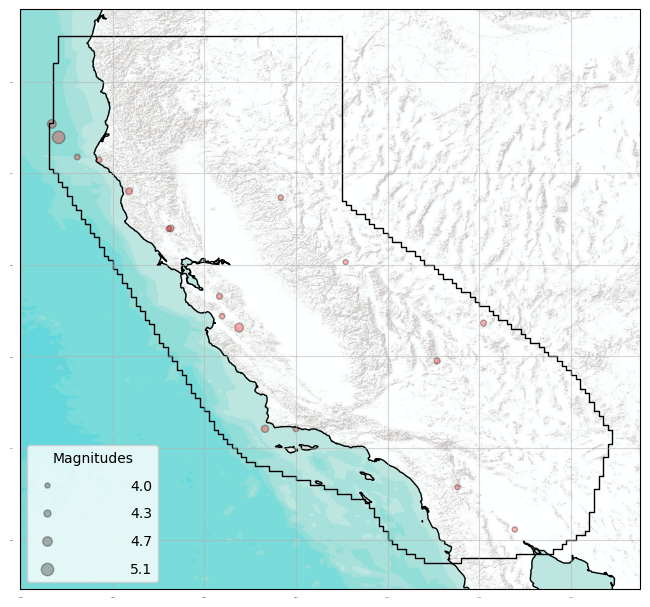

<GeoAxes: >

In [241]:
# set start and end date
start_time = csep.utils.time_utils.strptime_to_utc_datetime('2017-01-01 00:00:00.0')
end_time = csep.utils.time_utils.strptime_to_utc_datetime('2017-12-31 23:59:59.0')
# retrieve events in ComCat catalogue between start and end date
catalog = csep.query_comcat(start_time, end_time)

# set magnitude limits
min_mw = 3.95
max_mw = 8.95
# set magnitude bin length
dmw = 0.1

# Create space and magnitude regions. The forecast is already filtered in space and magnitude
magnitudes = csep.regions.magnitude_bins(min_mw, max_mw, dmw)
region = csep.regions.california_relm_region()

# Bind region information to the forecast
space_magnitude_region = csep.regions.create_space_magnitude_region(region, magnitudes)


# filter magnitude below 3.95
catalog.filter('magnitude >= 3.95')
# filter events outside spatial region
catalog.filter_spatial(space_magnitude_region)
# print summary information
print(catalog)

catalogEvents = catalog.to_dataframe()
catalog.plot(show=True)

### ETAS

In [242]:
## Load ETAS model
## start date: 01 Aug. 2007    end date: 30 Aug. 2018
## missing days: 0        min. magnitude: 3.95

# model path within the quatation marks **Depends on dowloading the forecast files and stored them in the data folder**
# file name is assumed to not have been renamed from download
etas_filename = '../data/ETAS_1day.hdf5'
# this will be a dictonary of pandas.DataFrames
ETAS = f_hdf5.load_hdf5_to_dict(etas_filename,
                                     start_date = '01/01/2017', # format dd/mm/yyyy
                                     end_date = '31/12/2017')

Loading year: 2017
Loading month: 1
Loading month: 10
Loading month: 11
Loading month: 12
Loading month: 2
Loading month: 3
Loading month: 4
Loading month: 5
Loading month: 6
Loading month: 7
Loading month: 8
Loading month: 9


#### Q-Score

In [243]:
#Initialize an empty list to store data
all_df = []
#Loop through the nested dictionary
for year, months in ETAS.items():
    for month, files in months.items():
        for file_, df in files.items():
            #Append the dataframe to the list
            all_df.append(df)
            
#combine all the dataframes in the files into a single dataframe
ETAS_forec = pd.concat(all_df, ignore_index = True)

#Optional to free memory space
del ETAS
del all_df

#Q Score Calculation with different percentage retention
print(QL.calculate_Q_score(fore_df= ETAS_forec,
                                cat_df = catalogEvents,
                                perc_retain = 0.05))

2.5255775


#### L-Score

In [244]:
print(QL.ell_score(fore_df= ETAS_forec,
                    cat_df = catalogEvents))

#Optional to free memory space
del ETAS_forec

-147.35815


### ETASV1.1

In [284]:
## Load ETASV1.1 model
## start date: 01 July 2012    end date: 30 June 2018
## missing days: 4      min. magnitude: 3.95

# model path within the quatation marks **Depends on dowloading the forecast files and stored them in the data folder**
# file name is assumed to not have been renamed from download
ETASV1_1_filename = '../data/ETASV1_1_1day.hdf5'
# this will be a dictonary of pandas.DataFrames
ETASV1_1 = f_hdf5.load_hdf5_to_dict(ETASV1_1_filename,
                                     start_date = '01/01/2017', # format dd/mm/yyy
                                     end_date = '31/12/2017')

Loading year: 2017
Loading month: 1
Loading month: 10
Loading month: 11
Loading month: 12
Loading month: 2
Loading month: 3
Loading month: 4
Loading month: 5
Loading month: 6
Loading month: 7
Loading month: 8
Loading month: 9


#### Q-Score

In [285]:
all_df = []
#Loop through the nested dictionary
for year, months in ETASV1_1.items():
    for month, files in months.items():
        for file_, df in files.items():
            #Append the dataframe to the list
            all_df.append(df)
            
#combine all the dataframes in the files into a single dataframe
ETASV1_1_forec = pd.concat(all_df, ignore_index = True)

#Optional to free memory space
del all_df
del ETASV1_1

#Q Score Calculation with different percentage retention
print(QL.calculate_Q_score(fore_df= ETASV1_1_forec,
                                cat_df = catalogEvents,
                                perc_retain = 0.05))

2.2102718


#### L-Score

In [286]:
print(QL.ell_score(fore_df= ETASV1_1_forec,
                    cat_df = catalogEvents))
#Optional to free memory space
del ETASV1_1_forec

-113.57508


### ETAS_DROneDayMd2

In [266]:
## Load ETAS_DROneDayMd2 model
## start date: 01 Oct. 2012    end date: 30 June 2018
## missing days: 17       min. magnitude: 3.95

# model path within the quatation marks **Depends on dowloading the forecast files and stored them in the data folder**
# file name is assumed to not have been renamed from download
ETAS_DROneDayMd2_filename = '../data/ETAS_DROneDayMd2_1day.hdf5'
# this will be a dictonary of pandas.DataFrames
ETAS_DROneDayMd2 = f_hdf5.load_hdf5_to_dict(ETAS_DROneDayMd2_filename,
                                     start_date = '01/01/2017', # format dd/mm/yyy
                                     end_date = '31/12/2017')

Loading year: 2017
Loading month: 1
Loading month: 10
Loading month: 11
Loading month: 12
Loading month: 2
Loading month: 3
Loading month: 4
Loading month: 5
Loading month: 6
Loading month: 7
Loading month: 8
Loading month: 9


#### Q-Score

In [267]:
all_df = []
#Loop through the nested dictionary
for year, months in ETAS_DROneDayMd2.items():
    for month, files in months.items():
        for file_, df in files.items():
            #Append the dataframe to the list
            all_df.append(df)
            
#combine all the dataframes in the files into a single dataframe
ETAS_DROneDayMd2_forec = pd.concat(all_df, ignore_index = True)

#Optional to free memory space
del all_df
del ETAS_DROneDayMd2

#Q Score Calculation with different percentage retention
print(QL.calculate_Q_score(fore_df= ETAS_DROneDayMd2_forec,
                                cat_df = catalogEvents,
                                perc_retain = 0.05))

3.8233087


#### L-Score

In [268]:
print(QL.ell_score(fore_df= ETAS_DROneDayMd2_forec,
                    cat_df = catalogEvents))
#Optional to free memory space
del ETAS_DROneDayMd2_forec

-101.22794


### ETAS_DROneDayMd3

In [260]:
## Load ETAS_DROneDayMd3 model
## start date: 01 Oct. 2012    end date: 30 June 2018
## missing days: 5       min. magnitude: 3.95

# model path within the quatation marks **Depends on dowloading the forecast files and stored them in the data folder**
# file name is assumed to not have been renamed from download
ETAS_DROneDayMd3_filename = '../data/ETAS_DROneDayMd3_1day.hdf5'
# this will be a dictonary of pandas.DataFrames
ETAS_DROneDayMd3 = f_hdf5.load_hdf5_to_dict(ETAS_DROneDayMd3_filename,
                                     start_date = '01/01/2017', # format dd/mm/yyy
                                     end_date = '31/12/2017')

Loading year: 2017
Loading month: 1
Loading month: 10
Loading month: 11
Loading month: 12
Loading month: 2
Loading month: 3
Loading month: 4
Loading month: 5
Loading month: 6
Loading month: 7
Loading month: 8
Loading month: 9


#### Q-Score

In [261]:
all_df = []
#Loop through the nested dictionary
for year, months in ETAS_DROneDayMd3.items():
    for month, files in months.items():
        for file_, df in files.items():
            #Append the dataframe to the list
            all_df.append(df)
            
#combine all the dataframes in the files into a single dataframe
ETAS_DROneDayMd3_forec = pd.concat(all_df, ignore_index = True)

#Optional to free memory space
del all_df
del ETAS_DROneDayMd3

#Q Score Calculation with different percentage retention
print(QL.calculate_Q_score(fore_df= ETAS_DROneDayMd3_forec,
                                cat_df = catalogEvents,
                                perc_retain = 0.05))

3.2654457


#### L-Score

In [262]:
print(QL.ell_score(fore_df= ETAS_DROneDayMd3_forec,
                    cat_df = catalogEvents))
#Optional to free memory space
del ETAS_DROneDayMd3_forec

-100.63479


### ETAS_DROneDayMd2.95

In [263]:
## Load ETAS_DROneDayMd2_95 model
## start date: 01 July 2016    end date: 30 June 2018
## missing days: 18       min. magnitude: 3.95

# model path within the quatation marks **Depends on dowloading the forecast files and stored them in the data folder**
# file name is assumed to not have been renamed from download
ETAS_DROneDayMd2_95_filename = '../data/ETAS_DROneDayMd2.95_1day.hdf5'
# this will be a dictonary of pandas.DataFrames
ETAS_DROneDayMd2_95 = f_hdf5.load_hdf5_to_dict(ETAS_DROneDayMd2_95_filename,
                                     start_date = '01/01/2017', # format dd/mm/yyy
                                     end_date = '31/12/2017')

Loading year: 2017
Loading month: 1
Loading month: 10
Loading month: 11
Loading month: 12
Loading month: 2
Loading month: 3
Loading month: 4
Loading month: 5
Loading month: 6
Loading month: 7
Loading month: 8
Loading month: 9


#### Q-Score

In [264]:
all_df = []
#Loop through the nested dictionary
for year, months in ETAS_DROneDayMd2_95.items():
    for month, files in months.items():
        for file_, df in files.items():
            #Append the dataframe to the list
            all_df.append(df)
            
#combine all the dataframes in the files into a single dataframe
ETAS_DROneDayMd2_95_forec = pd.concat(all_df, ignore_index = True)

#Optional to free memory space
del all_df
del ETAS_DROneDayMd2_95

#Q Score Calculation with different percentage retention
print(QL.calculate_Q_score(fore_df= ETAS_DROneDayMd2_95_forec,
                                cat_df = catalogEvents,
                                perc_retain = 0.05))

3.3383002


#### L-Score

In [265]:
print(QL.ell_score(fore_df= ETAS_DROneDayMd2_95_forec,
                    cat_df = catalogEvents))
#Optional to free memory space
del ETAS_DROneDayMd2_95_forec

-99.53112


### ETASSYN_DROneDayMd2.95

In [275]:
## Load ETASSYN_DROneDayMd2.95 model
## start date: 01 July 2016    end date: 30 June 2018
## missing days: 11      min. magnitude: 3.95

# model path within the quatation marks **Depends on dowloading the forecast files and stored them in the data folder**
# file name is assumed to not have been renamed from download
ETASSYN_DROneDayMd2_95_filename = '../data/ETASSYN_DROneDayMd2.95_1day.hdf5'
# this will be a dictonary of pandas.DataFrames
ETASSYN_DROneDayMd2_95 = f_hdf5.load_hdf5_to_dict(ETASSYN_DROneDayMd2_95_filename,
                                     start_date = '01/01/2017', # format dd/mm/yyy
                                     end_date = '31/12/2017')

Loading year: 2017
Loading month: 1
Loading month: 10
Loading month: 11
Loading month: 12
Loading month: 2
Loading month: 3
Loading month: 4
Loading month: 5
Loading month: 6
Loading month: 7
Loading month: 8
Loading month: 9


#### Q-Score

In [276]:
all_df = []
#Loop through the nested dictionary
for year, months in ETASSYN_DROneDayMd2_95.items():
    for month, files in months.items():
        for file_, df in files.items():
            #Append the dataframe to the list
            all_df.append(df)
            
#combine all the dataframes in the files into a single dataframe
ETASSYN_DROneDayMd2_95_forec = pd.concat(all_df, ignore_index = True)

#Optional to free memory space
del all_df
del ETASSYN_DROneDayMd2_95

#Q Score Calculation with different percentage retention
print(QL.calculate_Q_score(fore_df= ETASSYN_DROneDayMd2_95_forec,
                                cat_df = catalogEvents,
                                perc_retain = 0.05))

3.942039


#### L-Score

In [277]:
print(QL.ell_score(fore_df= ETASSYN_DROneDayMd2_95_forec,
                    cat_df = catalogEvents))
#Optional to free memory space
del ETASSYN_DROneDayMd2_95_forec

-99.93555


### ETAS_HWMd3

In [281]:
## Load ETAS_HWMd3 model
## start date: 01 Oct. 2012    end date: 30 June 2018
## missing days: 5      min. magnitude: 3.95

# model path within the quatation marks **Depends on dowloading the forecast files and stored them in the data folder**
# file name is assumed to not have been renamed from download
ETAS_HWMd3_filename = '../data/ETAS_HWMd3_1day.hdf5'
# this will be a dictonary of pandas.DataFrames
ETAS_HWMd3 = f_hdf5.load_hdf5_to_dict(ETAS_HWMd3_filename,
                                     start_date = '01/01/2017', # format dd/mm/yyy
                                     end_date = '31/12/2017')

Loading year: 2017
Loading month: 1
Loading month: 10
Loading month: 11
Loading month: 12
Loading month: 2
Loading month: 3
Loading month: 4
Loading month: 5
Loading month: 6
Loading month: 7
Loading month: 8
Loading month: 9


#### Q-Score

In [282]:
all_df = []
#Loop through the nested dictionary
for year, months in ETAS_HWMd3.items():
    for month, files in months.items():
        for file_, df in files.items():
            #Append the dataframe to the list
            all_df.append(df)
            
#combine all the dataframes in the files into a single dataframe
ETAS_HWMd3_forec = pd.concat(all_df, ignore_index = True)

#Optional to free memory space
del all_df
del ETAS_HWMd3

#Q Score Calculation with different percentage retention
print(QL.calculate_Q_score(fore_df= ETAS_HWMd3_forec,
                                cat_df = catalogEvents,
                                perc_retain = 0.05))

1.6154245


#### L-Score

In [283]:
print(QL.ell_score(fore_df= ETAS_HWMd3_forec,
                     cat_df = catalogEvents))
#Optional to free memory space
del ETAS_HWMd3_forec

-105.5217


### GSF_ISO

In [251]:
## Load GSF_ISO model
## start date: 01 Oct. 2016    end date: 30 June 2018
## missing days: 1        min. magnitude: 3.95

# model path within the quatation marks **Depends on dowloading the forecast files and stored them in the data folder**
# file name is assumed to not have been renamed from download
ISO_filename = '../data/GSF_ISO_1day.hdf5'
# this will be a dictonary of pandas.DataFrames
ISO = f_hdf5.load_hdf5_to_dict(ISO_filename,
                                     start_date = '01/01/2017', # format dd/mm/yyy
                                     end_date = '31/12/2017')

Loading year: 2017
Loading month: 1
Loading month: 10
Loading month: 11
Loading month: 12
Loading month: 2
Loading month: 3
Loading month: 4
Loading month: 5
Loading month: 6
Loading month: 7
Loading month: 8
Loading month: 9


#### Q-Score

In [252]:
all_df = []
#Loop through the nested dictionary
for year, months in ISO.items():
    for month, files in months.items():
        for file_, df in files.items():
            #Append the dataframe to the list
            all_df.append(df)
            
#combine all the dataframes in the files into a single dataframe
ISO_forec = pd.concat(all_df, ignore_index = True)

#Optional to free memory space
del all_df
del ISO

#Q Score Calculation with different percentage retention
print(QL.calculate_Q_score(fore_df= ISO_forec,
                                cat_df = catalogEvents,
                                perc_retain = 0.05))

0.9367224


#### L-Score

In [253]:
print(QL.ell_score(fore_df= ISO_forec,
                    cat_df = catalogEvents))
#Optional to free memory space
del ISO_forec

-144.61604


### GSF_ANISO

In [254]:
## Load GSF_ANISO model
## start date: 01 Oct. 2016    end date: 30 June 2018
## missing days: 1        min. magnitude: 3.95

# model path within the quatation marks **Depends on dowloading the forecast files and stored them in the data folder**
# file name is assumed to not have been renamed from download
ANISO_filename = '../data/GSF_ANISO_1day.hdf5'
# this will be a dictonary of pandas.DataFrames
ANISO = f_hdf5.load_hdf5_to_dict(ANISO_filename,
                                     start_date = '01/01/2017', # format dd/mm/yyy
                                     end_date = '31/12/2017')

Loading year: 2017
Loading month: 1
Loading month: 10
Loading month: 11
Loading month: 12
Loading month: 2
Loading month: 3
Loading month: 4
Loading month: 5
Loading month: 6
Loading month: 7
Loading month: 8
Loading month: 9


#### Q-Score

In [255]:
all_df = []
#Loop through the nested dictionary
for year, months in ANISO.items():
    for month, files in months.items():
        for file_, df in files.items():
            #Append the dataframe to the list
            all_df.append(df)
            
#combine all the dataframes in the files into a single dataframe
ANISO_forec = pd.concat(all_df, ignore_index = True)

#Optional to free memory space
del all_df
del ANISO

#Q Score Calculation with different percentage retention
print(QL.calculate_Q_score(fore_df= ANISO_forec,
                                cat_df = catalogEvents,
                                perc_retain = 0.05))

0.7680183


#### L-Score

In [256]:
print(QL.ell_score(fore_df= ANISO_forec,
                    cat_df = catalogEvents))
#Optional to free memory space
del ANISO_forec

-134.8453


### STEPJAVA

In [248]:
## Load STEPJAVA model
## start date: 01 Sep. 2010    end date: 30 June 2018
## missing days: 0        min. magnitude: 3.95

# model path within the quatation marks **Depends on dowloading the forecast files and stored them in the data folder**
# file name is assumed to not have been renamed from download
STEPJAVA_filename = '../data/STEPJAVA_1day.hdf5'
# this will be a dictonary of pandas.DataFrames
STEPJAVA = f_hdf5.load_hdf5_to_dict(STEPJAVA_filename,
                                     start_date = '01/01/2017', # format dd/mm/yyy
                                     end_date = '31/12/2017')

Loading year: 2017
Loading month: 1
Loading month: 10
Loading month: 11
Loading month: 12
Loading month: 2
Loading month: 3
Loading month: 4
Loading month: 5
Loading month: 6
Loading month: 7
Loading month: 8
Loading month: 9


#### Q-Score

In [249]:
#Initialize an empty list to store data
all_df = []
#Loop through the nested dictionary
for year, months in STEPJAVA.items():
    for month, files in months.items():
        for file_, df in files.items():
            #Append the dataframe to the list
            all_df.append(df)
            
#combine all the dataframes in the files into a single dataframe
STEPJAVA_forec = pd.concat(all_df, ignore_index = True)

#Optional to free memory space
del all_df
del STEPJAVA

#Q Score Calculation with different percentage retention
print(QL.calculate_Q_score(fore_df= STEPJAVA_forec,
                                cat_df = catalogEvents,
                                perc_retain = 0.05))

0.0


#### L-Score

In [250]:
print(QL.ell_score(fore_df= STEPJAVA_forec,
                 cat_df = catalogEvents))

# add waterlevelto zero valued bins
print(QL.ell_score(fore_df= STEPJAVA_forec,
                 cat_df = catalogEvents,
                 waterlevel = 1e-6))

#Optional to free memory space
del STEPJAVA_forec

C:\Users\arjon\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


-inf


C:\Users\arjon\OneDrive\Documents\S Score\Project\src\QandL.py:39: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1e-06' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.
  df_out.iloc[target_idx,6] = waterlevel


-133.11524686813593


### KJSSOneDay

In [245]:
## Load KJSSOneDay model
## start date: 01 Jan. 2009    end date: 30 June 2018
## missing days: 0        min. magnitude: 3.95

# model path within the quatation marks **Depends on dowloading the forecast files and stored them in the data folder**
# file name is assumed to not have been renamed from download
KJSSOne_filename = '../data/KJSSOneDayCalifornia_1day.hdf5'
# this will be a dictonary of pandas.DataFrames
KJSSOne = f_hdf5.load_hdf5_to_dict(KJSSOne_filename,
                                     start_date = '01/01/2017', # format dd/mm/yyy
                                     end_date = '31/12/2017')

Loading year: 2017
Loading month: 1
Loading month: 10
Loading month: 11
Loading month: 12
Loading month: 2
Loading month: 3
Loading month: 4
Loading month: 5
Loading month: 6
Loading month: 7
Loading month: 8
Loading month: 9


#### Q-Score

In [246]:
#Initialize an empty list to store data
all_df = []
#Loop through the nested dictionary
for year, months in KJSSOne.items():
    for month, files in months.items():
        for file_, df in files.items():
            #Append the dataframe to the list
            all_df.append(df)
            
#combine all the dataframes in the files into a single dataframe
KJSSOne_forec = pd.concat(all_df, ignore_index = True)

#Optional to free memory space
del KJSSOne
del all_df

#Q Score Calculation with different percentage retention
print(QL.calculate_Q_score(fore_df= KJSSOne_forec,
                                cat_df = catalogEvents,
                                perc_retain = 0.05))

0.37769166


#### L-Score

In [247]:
print(QL.ell_score(fore_df= KJSSOne_forec,
                        cat_df = catalogEvents))

#Optional to free memory space
del KJSSOne_forec

-112.88315


### K3Md3

In [257]:
## Load K3Md3 model
## start date: 01 Oct. 2012    end date: 30 June 2018
## missing days: 5       min. magnitude: 3.95

# model path within the quatation marks **Depends on dowloading the forecast files and stored them in the data folder**
# file name is assumed to not have been renamed from download
K3Md3_filename = '../data/K3Md3_1day.hdf5'
# this will be a dictonary of pandas.DataFrames
K3Md3 = f_hdf5.load_hdf5_to_dict(K3Md3_filename,
                                     start_date = '01/01/2017', # format dd/mm/yyy
                                     end_date = '31/12/2017')

Loading year: 2017
Loading month: 1
Loading month: 10
Loading month: 11
Loading month: 12
Loading month: 2
Loading month: 3
Loading month: 4
Loading month: 5
Loading month: 6
Loading month: 7
Loading month: 8
Loading month: 9


#### Q-Score

In [258]:
all_df = []
#Loop through the nested dictionary
for year, months in K3Md3.items():
    for month, files in months.items():
        for file_, df in files.items():
            #Append the dataframe to the list
            all_df.append(df)
            
#combine all the dataframes in the files into a single dataframe
K3Md3_forec = pd.concat(all_df, ignore_index = True)

#Optional to free memory space
del all_df
del K3Md3

#Q Score Calculation with different percentage retention
print(QL.calculate_Q_score(fore_df= K3Md3_forec,
                                cat_df = catalogEvents,
                                perc_retain = 0.05))

0.1325039


#### L-Score

In [259]:
print(QL.ell_score(fore_df= K3Md3_forec,
                    cat_df = catalogEvents))
#Optional to free memory space
del K3Md3_forec

-134.32376


### ETAS_DROneDayPPEMd2

In [272]:
## Load ETAS_DROneDayPPEMd2 model
## start date: 01 Oct. 2012    end date: 30 June 2018
## missing days: 18      min. magnitude: 3.95

# model path within the quatation marks **Depends on dowloading the forecast files and stored them in the data folder**
# file name is assumed to not have been renamed from download
ETAS_DROneDayPPEMd2_filename = '../data/ETAS_DROneDayPPEMd2_1day.hdf5'
# this will be a dictonary of pandas.DataFrames
ETAS_DROneDayPPEMd2 = f_hdf5.load_hdf5_to_dict(ETAS_DROneDayPPEMd2_filename,
                                     start_date = '01/01/2017', # format dd/mm/yyy
                                     end_date = '31/12/2017')

Loading year: 2017
Loading month: 1
Loading month: 10
Loading month: 11
Loading month: 12
Loading month: 2
Loading month: 3
Loading month: 4
Loading month: 5
Loading month: 6
Loading month: 7
Loading month: 8
Loading month: 9


#### Q-Score

In [273]:
all_df = []
#Loop through the nested dictionary
for year, months in ETAS_DROneDayPPEMd2.items():
    for month, files in months.items():
        for file_, df in files.items():
            #Append the dataframe to the list
            all_df.append(df)
            
#combine all the dataframes in the files into a single dataframe
ETAS_DROneDayPPEMd2_forec = pd.concat(all_df, ignore_index = True)

#Optional to free memory space
del all_df
del ETAS_DROneDayPPEMd2

#Q Score Calculation with different percentage retention
print(QL.calculate_Q_score(fore_df= ETAS_DROneDayPPEMd2_forec,
                                cat_df = catalogEvents,
                                perc_retain = 0.05))

0.6988856


#### L-Score

In [274]:
print(QL.ell_score(fore_df= ETAS_DROneDayPPEMd2_forec,
                    cat_df = catalogEvents))
#Optional to free memory space
del ETAS_DROneDayPPEMd2_forec

-151.1072


### ETAS_DROneDayPPEMd3

In [269]:
## Load ETAS_DROneDayPPEMd3 model
## start date: 01 Oct. 2012    end date: 30 June 2018
## missing days: 6      min. magnitude: 3.95

# model path within the quatation marks **Depends on dowloading the forecast files and stored them in the data folder**
# file name is assumed to not have been renamed from download
ETAS_DROneDayPPEMd3_filename = '../data/ETAS_DROneDayPPEMd3_1day.hdf5'
# this will be a dictonary of pandas.DataFrames
ETAS_DROneDayPPEMd3 = f_hdf5.load_hdf5_to_dict(ETAS_DROneDayPPEMd3_filename,
                                     start_date = '01/01/2017', # format dd/mm/yyy
                                     end_date = '31/12/2017')

Loading year: 2017
Loading month: 1
Loading month: 10
Loading month: 11
Loading month: 12
Loading month: 2
Loading month: 3
Loading month: 4
Loading month: 5
Loading month: 6
Loading month: 7
Loading month: 8
Loading month: 9


#### Q-Score

In [270]:
all_df = []
#Loop through the nested dictionary
for year, months in ETAS_DROneDayPPEMd3.items():
    for month, files in months.items():
        for file_, df in files.items():
            #Append the dataframe to the list
            all_df.append(df)
            
#combine all the dataframes in the files into a single dataframe
ETAS_DROneDayPPEMd3_forec = pd.concat(all_df, ignore_index = True)

#Optional to free memory space
del all_df
del ETAS_DROneDayPPEMd3

#Q Score Calculation with different percentage retention
print(QL.calculate_Q_score(fore_df= ETAS_DROneDayPPEMd3_forec,
                                cat_df = catalogEvents,
                                perc_retain = 0.05))

1.1019335


#### L-Score

In [271]:
print(QL.ell_score(fore_df= ETAS_DROneDayPPEMd3_forec,
                    cat_df = catalogEvents))
#Optional to free memory space
del ETAS_DROneDayPPEMd3_forec

-140.43784


### ETAS_HW_K3_AVERAGE_Md3

In [278]:
## Load ETAS_HW_K3_AVERAGE_Md3 model
## start date: 01 Oct. 2012    end date: 30 June 2018
## missing days: 23      min. magnitude: 3.95

# model path within the quatation marks **Depends on dowloading the forecast files and stored them in the data folder**
# file name is assumed to not have been renamed from download
ETAS_HW_K3_AVERAGE_Md3_filename = '../data/ETAS_HW_K3_AVERAGE_Md3_1day.hdf5'
# this will be a dictonary of pandas.DataFrames
ETAS_HW_K3_AVERAGE_Md3 = f_hdf5.load_hdf5_to_dict(ETAS_HW_K3_AVERAGE_Md3_filename,
                                     start_date = '01/01/2017', # format dd/mm/yyy
                                     end_date = '31/12/2017')

Loading year: 2017
Loading month: 1
Loading month: 10
Loading month: 11
Loading month: 12
Loading month: 2
Loading month: 3
Loading month: 4
Loading month: 5
Loading month: 6
Loading month: 7
Loading month: 8
Loading month: 9


#### Q-Score

In [279]:
all_df = []
#Loop through the nested dictionary
for year, months in ETAS_HW_K3_AVERAGE_Md3.items():
    for month, files in months.items():
        for file_, df in files.items():
            #Append the dataframe to the list
            all_df.append(df)
            
#combine all the dataframes in the files into a single dataframe
ETAS_HW_K3_AVERAGE_Md3_forec = pd.concat(all_df, ignore_index = True)

#Optional to free memory space
del all_df
del ETAS_HW_K3_AVERAGE_Md3

#Q Score Calculation with different percentage retention
print(QL.calculate_Q_score(fore_df= ETAS_HW_K3_AVERAGE_Md3_forec,
                                cat_df = catalogEvents,
                                perc_retain = 0.05))

1.0725383


#### L-Score

In [280]:
print(QL.ell_score(fore_df= ETAS_HW_K3_AVERAGE_Md3_forec,
                    cat_df = catalogEvents))
#Optional to free memory space
del ETAS_HW_K3_AVERAGE_Md3_forec

-113.54112
